<a href="https://colab.research.google.com/github/LucasIBoczkowski/lucasiboczkowski.github.io/blob/main/International%20Soccer%20Matches/International_soccer_matches_Lucas_Boczkowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science
# Project: International soccer matches


### Lucas Boczkowski


## 1. Abstract

This project comprises a wide range of information on soccer (football) matches played between nations.
<br><br>
It provides a valuable collection of detailed records of international matches, including different tournaments, like friendlies, World Cup qualifiers, continental tournaments, and, of course, the World Cup. These records aim to address questions relevant to the given theme.
<br><br>
The **motivation** behind this project is to offer a reliable source of data for conducting detailed analyses and making informed decisions in various aspects of international soccer. The **target audience** is broad and diverse, including football professionals (coaches, technical directors, and personnel from soccer teams and clubs), researchers and academics, sports analysts, or simply football enthusiasts. All of them can utilize this data to analyze their teams' performance, identify areas for improvement, make data-driven strategic decisions, or simply enjoy a deeper understanding of this beautiful sport and engage in data-driven discussions.
<br><br>
The utilized file covers information from August 1993 to June 2022, and it provides a comprehensive and detailed compilation of information on matches played between nations during the mentioned period. Its diverse content and extensive coverage allow for in-depth analysis of the recent history of international soccer and facilitate studies and assessments in multiple aspects related to international soccer matches.

## 2. Objectives

These are the objectives to be achieved in this journey.

- Firstly, one objective is to examine and break down the performance of national teams over nearly thirty years of international competition. Each match represents a chapter in the soccer history, and the aim here is to unravel them.
- Next, there will be a look into the past to explore historical trends that have shaped soccer globally. How has this sport evolved over time? What lessons can we learn from this data? The intention is to unveil these answers and discover insights that drive the continuous improvement of this exciting sport.
- On the other hand, there is an intention to investigate the influence of playing at home. What makes some teams unbeatable on their home turf? What is the secret behind their strength at home? This question has led to a particular quest: understanding a team's strength when playing at home to **predict results**.

### 2.1. Context

As data scientist we can use this and analyze the historical performance of national teams in various international tournaments using the information contained in the dataset. The goal is to enable and make informed decisions and establish more accurate odds.
<br><br>
Doing so, we can understand the potential advantages a national team may have when playing at home, the distribution of matches, as well as the behavior of teams in friendly matches. This information will help in developing successful personalized marketing strategies.
<br><br>
Finally, this information will be helpful to identify interesting patterns or trends. For instance, investigating if there is any correlation between certain data points, such as the number of goals scored, the FIFA ranking of each team, the number of games won, etc.

### 2.2. The questions to answer

The following specific questions will be addressed,  manipulating the available data and providing visualizations for each of them:

1. Which countries have the highest participation in the World Cup?
2. Are international friendly matches the ones where the most goals are scored?
3. On which day of the week do we find the most international soccer matches?
4. Do the teams that score the most goals also have higher positions in the FIFA ranking?
5. Are the teams that have won the most matches also better positioned in the FIFA ranking?
6. Is there indeed an influence for a team when playing as the home side in international matches?

### 2.3. Analytic context

The dataset used is public and provides relevant information for the analysis of international soccer matches.
<br><br>
The work here involves conducting an exploratory data analysis, creating visualizations, performing descriptive statistics, and developing machine learning models to generate meaningful insights that enhance our understanding of this information.

## 3. Data Acquisition

The selected dataset comes from the Kaggle platform, which provides various public datasets and offers a range of resources related to data science and machine learning. Specifically, this dataset is sourced from: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022

It is a file named international_matches.csv, which serves as the foundation for addressing all the outlined problems that it will be developed further.

### 3.1. Importing libraries and connecting to Google Drive

In [ ]:
# Install the one I need for the hyperparameter tuning
! pip install scikit-optimize

In [ ]:
# XGBoost library
! pip install xgboost

In [ ]:
# Dataframes and graph libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

# Google Colab connection
from google.colab import drive

# Map library
import plotly.express as px

# Machine learning model libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
import time
from skopt.space import Categorical

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Google Drive connection
drive.mount('/content/mi_carpeta')
%cd /content/mi_carpeta/MyDrive/'Colab Notebooks'/'Portfolio'/'International soccer matches'

Drive already mounted at /content/mi_carpeta; to attempt to forcibly remount, call drive.mount("/content/mi_carpeta", force_remount=True).
/content/mi_carpeta/MyDrive/Colab Notebooks/Portfolio/International soccer matches


In [ ]:
# Set the maximum number of columns to display without truncation
pd.set_option('display.max_columns', None)
# Set the maximum width of columns' contents to display without truncation
pd.set_option('display.max_colwidth', None)
# Set the maximum number of rows to display without truncation
pd.set_option('display.max_rows', None)

In [ ]:
# Read the CSV file
df_soccer = pd.read_csv("international_matches.csv", delimiter=',')

In [ ]:
print ("To view the first rows of the selected dataset, the head() function is executed:")
df_soccer.head()

To view the first rows of the selected dataset, the head() function is executed:


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Exploratory data analysis (EDA)

### 4.1. Understanding the data

First of all, let's look at the shape of the dataset:

In [ ]:
print ("In total, the original dataset has " + str(df_soccer.shape[0]) + " rows and " + str(df_soccer.shape[1]) + " data columns.")

In total, the original dataset has 23921 rows and 25 data columns.


Let's look at its general information:

In [ ]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

Let's observe, in detail, the content of each column and its data type:

In [ ]:
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[0] + "\033[1m" + "\033[0m" + " indicates the match date and is an " + str(df_soccer.iloc[:,0].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[1] + "\033[1m" + "\033[0m" + " indicates the name of the local team, and is an " + str(df_soccer.iloc[:,1].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[2] + "\033[1m" + "\033[0m" + " indicates the name of the visiting team, and is an " + str(df_soccer.iloc[:,2].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[3] + "\033[1m" + "\033[0m" + " indicates the continent of the local team, and is an " + str(df_soccer.iloc[:,3].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[4] + "\033[1m" + "\033[0m" + " indicates the continent of the visiting team, and is an " + str(df_soccer.iloc[:,4].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[5] + "\033[1m" + "\033[0m" + " is the FIFA ranking of the local team at the time of the match, and is an " + str(df_soccer.iloc[:,5].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[6] + "\033[1m" + "\033[0m" + " is the FIFA ranking of the visiting team at the time of the match, and is an " + str(df_soccer.iloc[:,6].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[7] + "\033[1m" + "\033[0m" + " is the FIFA score of the local team at the time of the match, and is an " + str(df_soccer.iloc[:,7].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[8] + "\033[1m" + "\033[0m" + " is the FIFA score of the visiting team at the time of the match, and is an " + str(df_soccer.iloc[:,8].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[9] + "\033[1m" + "\033[0m" + " is the score of the local team in full time, including extra time but excluding penalty shootouts, and is an " + str(df_soccer.iloc[:,9].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[10] + "\033[1m" + "\033[0m" + " is the score of the visiting team in full time, including extra time but excluding penalty shootouts, and is an " + str(df_soccer.iloc[:,10].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[11] + "\033[1m" + "\033[0m" + " is the name of the tournament, and is an " + str(df_soccer.iloc[:,11].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[12] + "\033[1m" + "\033[0m" + " is the city where the match was played, and is an " + str(df_soccer.iloc[:,12].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[13] + "\033[1m" + "\033[0m" + " is the country where the match was played, and is an " + str(df_soccer.iloc[:,13].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[14] + "\033[1m" + "\033[0m" + " indicates whether the match was played on a neutral field, and is a " + str(df_soccer.iloc[:,14].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[15] + "\033[1m" + "\033[0m" + " indicates whether the match included penalties, and is an " + str(df_soccer.iloc[:,15].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[16] + "\033[1m" + "\033[0m" + " indicates whether the local team won, lost, or draw and is an " + str(df_soccer.iloc[:,16].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[17] + "\033[1m" + "\033[0m" + " is the FIFA score of the local team's goalkeeper, and is a " + str(df_soccer.iloc[:,17].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[18] + "\033[1m" + "\033[0m" + " is the FIFA score of the visiting team's goalkeeper, and is a " + str(df_soccer.iloc[:,18].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[19] + "\033[1m" + "\033[0m" + " is the average FIFA score for the defense of the local team, and is a " + str(df_soccer.iloc[:,19].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[20] + "\033[1m" + "\033[0m" + " is the average FIFA score for the forwards of the local team, and is a " + str(df_soccer.iloc[:,20].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[21] + "\033[1m" + "\033[0m" + " is the average FIFA score for the midfield of the local team, and is a " + str(df_soccer.iloc[:,21].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[22] + "\033[1m" + "\033[0m" + " is the average FIFA score for the defense of the visiting team, and is a " + str(df_soccer.iloc[:,22].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[23] + "\033[1m" + "\033[0m" + " is the average FIFA score for the forwards of the visiting team, and is a " + str(df_soccer.iloc[:,23].dtype) + " data type.\033[0m")
print ("\033[0m" + "\u2022 Column " + "\033[1m" + df_soccer.columns[24] + "\033[1m" + "\033[0m" + " is the average FIFA score for the midfield of the visiting team, and is a " + str(df_soccer.iloc[:,24].dtype) + " data type.\033[0m")

• Column date indicates the match date and is an object data type.
• Column home_team indicates the name of the local team, and is an object data type.
• Column away_team indicates the name of the visiting team, and is an object data type.
• Column home_team_continent indicates the continent of the local team, and is an object data type.
• Column away_team_continent indicates the continent of the visiting team, and is an object data type.
• Column home_team_fifa_rank is the FIFA ranking of the local team at the time of the match, and is an int64 data type.
• Column away_team_fifa_rank is the FIFA ranking of the visiting team at the time of the match, and is an int64 data type.
• Column home_team_total_fifa_points is the FIFA score of the local team at the time of the match, and is an int64 data type.
• Column away_team_total_fifa_points is the FIFA score of the visiting team at the time of the match, and is an int64 data type.
• Column home_team_score is the score of the local team in 

Another way to determine the data type of each column is:

In [ ]:
df_soccer.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

Let's do an analysis of its most important variables, in this way:

In [ ]:
print ("\u2022 As checked previously, there are " + str(df_soccer.shape[0]) + " matches to analyze with their " + str(df_soccer.shape[1]) + " data variables.")
print ("\u2022 The first match is on " + df_soccer['date'].min() + " and the last one is on " + df_soccer['date'].max() + ".")
print ("\u2022 The dataset covers almost " + str(round((pd.to_datetime(df_soccer['date']).max() - pd.to_datetime(df_soccer['date']).min()) / np.timedelta64(1, 'Y'))) + " years of soccer history.")
print ("\u2022 There are " + str((pd.to_datetime(df_soccer['date']).max() - pd.to_datetime(df_soccer['date']).min()).days) + " soccer days.")
print ("\u2022 " + str(len(set(df_soccer['home_team']).union(set(df_soccer['away_team'])))) + " analyzed teams.")
print ("\u2022 In total, there are soccer matches from " + str(df_soccer['tournament'].nunique()) + " different tournaments.")
print ("\u2022 The number of countries where matches have been played is " + str(df_soccer['country'].nunique()) + ".")
print ("\u2022 The number of cities with matches is " + str(df_soccer['city'].nunique()) + ".")
print ("\u2022 " + str(df_soccer['home_team_score'].sum()) + " goals scored by home teams.")
print ("\u2022 " + str(df_soccer['away_team_score'].sum()) + " goals scored by visiting teams.")

• As checked previously, there are 23921 matches to analyze with their 25 data variables.
• The first match is on 1993-08-08 and the last one is on 2022-06-14.
• The dataset covers almost 29 years of soccer history.
• There are 10537 soccer days.
• 211 analyzed teams.
• In total, there are soccer matches from 82 different tournaments.
• The number of countries where matches have been played is 217.
• The number of cities with matches is 1576.
• 38494 goals scored by home teams.
• 25554 goals scored by visiting teams.


Let's observe an analysis of the descriptive statistics of the DataFrame in its numerical columns:

In [ ]:
df_soccer.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


With this, it can be appreciated some very interesting data, such as the following:

- The mean FIFA ranking is higher in visiting teams than in home teams.
- 31 is the maximum number of goals scored by a home team in a single match.
- 21 is the maximum number of goals scored by a visiting team in a single match.
- The average number of goals is higher in teams playing at home.

## 5. Data Wrangling

Next, the dataset will be prepared in order to conduct a more precise analysis. It will be handled missing data and extract information from the 'date' column to determine the year, month, and day of the week, separately.

### 5.1. Preparing the data

Let's generate an auxiliary dataset (named 'df_soccer_modified' and serving as the basis for a more in-depth analysis) to replace null values with averages from the original dataset and to add values related to the date of each played match.

In [ ]:
df_soccer_modified = df_soccer

In [ ]:
print ("Let's check that the auxiliary dataset is equal to the original dataset using the head() function:")
df_soccer_modified.head()

Let's check that the auxiliary dataset is equal to the original dataset using the head() function:


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2. Duplicates check

Let's check if there is any duplicated row in the dataset:

In [ ]:
# Verify duplicated rows in the dataFrame
duplicates = df_soccer_modified.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


This means that in the dataset, there is no duplicated information, and each row is unique.

### 5.3. Handling missing values

The presence of missing values can be checked in different ways. One way to do it, is by using a chart like the following:

<Axes: >

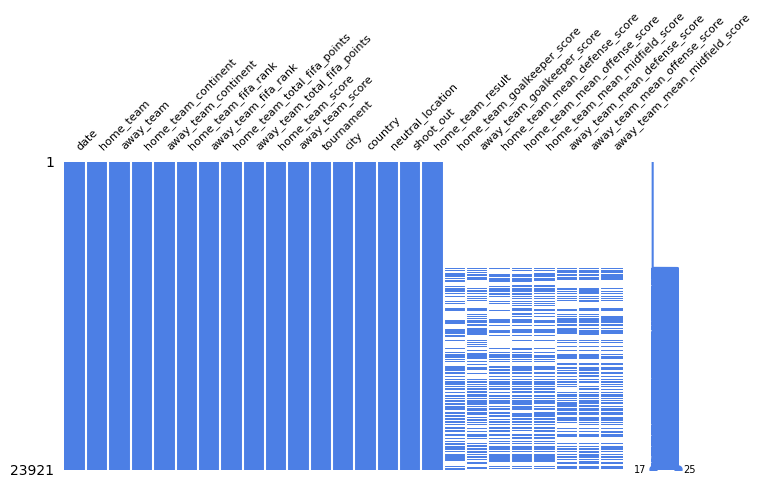

In [ ]:
msno.matrix(df_soccer_modified, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

Through the chart, it can be observed that there are several columns with missing values, starting from *home_team_goalkeeper_score* onward.

Nulls can be checked with a list also, column by column:

In [ ]:
df_soccer_modified.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

The last columns, related to the 'score' of players in different positions on the field, have null values (and they are float64).
<br><br>
Let's calculate the average for each and replace the null values with the corresponding averages.

Let's look for null values and replace them with the average of the corresponding column.

In [ ]:
for i in range(df_soccer_modified.shape[1]):
  if df_soccer_modified.iloc[i:,i].isnull().sum() > 0:
    df_soccer_modified.iloc[:,i] = df_soccer_modified.iloc[:,i].replace(np.nan, df_soccer_modified.iloc[:,i].mean())

Now the auxiliary dataset looks like this:

In [ ]:
df_soccer_modified.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143


Let's verify that we no longer have any null values in any of its columns:

In [ ]:
df_soccer.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

Or, in the entire dataset:

In [ ]:
df_soccer_modified.isnull().sum().sum()

0

### 5.4. Adding 'date' columns

Now, the first column named 'date', which is of an object data type, shows the date of the match. We can add columns for Year, Month, and Day of the week to our auxiliary dataset, based on the data in this 'date' column.

Let's see the column data type:

In [ ]:
df_soccer_modified["date"].dtype

dtype('O')

This shows that the 'date' column is an Object. Let's transform this column into a date type column.

In [ ]:
df_soccer_modified['date'] = pd.to_datetime(df_soccer_modified['date'])
df_soccer_modified["date"].dtype

dtype('<M8[ns]')

Which means that now the 'date' column is a 'datetime' column. Now it can be extracted the year, month, and day of the week for each row from it and add them to our auxiliary dataset.

In [ ]:
df_soccer_modified['year'] = df_soccer_modified['date'].dt.year
df_soccer_modified['month'] = df_soccer_modified['date'].dt.month
df_soccer_modified['weekday'] = df_soccer_modified['date'].dt.day_name()
df_soccer_modified.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,month,weekday
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday


Let's add these ones to the description list:

In [ ]:
print ("\033[0m" + "\u2022 Columna " + "\033[1m" + df_soccer.columns[25] + "\033[1m" + "\033[0m" + " indicates the year of the match, and its data type is " + str(df_soccer.iloc[:,0].dtype) + ".\033[0m")
print ("\033[0m" + "\u2022 Columna " + "\033[1m" + df_soccer.columns[26] + "\033[1m" + "\033[0m" + " indicates the month of the match, and its data type is " + str(df_soccer.iloc[:,1].dtype) + ".\033[0m")
print ("\033[0m" + "\u2022 Columna " + "\033[1m" + df_soccer.columns[27] + "\033[1m" + "\033[0m" + " indicates the weekday of the match, and its data type is " + str(df_soccer.iloc[:,2].dtype) + ".\033[0m")

• Columna year indicates the year of the match, and its data type is datetime64[ns].
• Columna month indicates the month of the match, and its data type is object.
• Columna weekday indicates the weekday of the match, and its data type is object.


### 5.5. Summarizing the dataset

Let's see the dataset after changes:

In [ ]:
df_soccer_modified.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,month,weekday
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday


In [ ]:
print ("In total, the modified dataset has " + str(df_soccer_modified.shape[0]) + " rows and " + str(df_soccer_modified.shape[1]) + " columns.")

In total, the modified dataset has 23921 rows and 28 columns.


## 6. Research questions

### 6.1. Teams with the highest participation in the World Cup

#### Hypothesis

Almost a century ago, when the passion for soccer began to weave its network around the world, a dream came true. A dream shared by entire nations, a dream forged in the heat of the stadiums and in the hearts of the players. That dream was the World Cup.
<br><br>
In this thrilling journey, there are **five teams** that have conquered the World Cup on multiple occasions. As in any great competition, the battle for the title is fierce, and only the bravest and most talented can lift the most coveted trophy of all.
<br><br>
1. At the top of this mountain of football heroes is **Brazil, with five crowns to its name**. Its players have brought the magic of football to every corner of the world, leaving an indelible mark on the sport's history.
2. Alongside them, **Italy and Germany, with four Cups each**, are giants who have left an indelible mark on the green canvas of the stadiums.
3. **Argentina, with three titles**, also joins this select group of champions. As a curiosity, the dataset does not include Argentina's glorious and unforgettable triumph in the 2022 World Cup, an achievement that undoubtedly strengthens its legacy.
4. Let's not forget **France, with two World Cups** in its showcase, a team that has demonstrated its skill on the field time and time again.

But what about the relationship between the number of matches played and the number of World Cups won?

- The hypothesis **H<sub>1</sub>** suggests that the teams that have played more matches in the World Cup are also the ones that have lifted the cup more times. It is a logical assumption, a reflection of the effort and tenacity required to reach the top.
- But let's consider the possibility that this is not true. The **H<sub>0</sub>**, the null hypothesis, proposes that the most successful teams are not necessarily the ones that have played the most matches.

Let's see what the data tells us, using a graph.

#### Development

First, let's generate a new dataset for this case, by applying a filter to work only with matches from the tournament called "FIFA World Cup."

In [ ]:
df_soccer_modified_case_1 = df_soccer_modified[df_soccer_modified['tournament'] == 'FIFA World Cup']
df_soccer_modified_case_1.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,month,weekday
385,1994-06-17,Germany,Bolivia,Europe,South America,1,43,0,0,1,0,FIFA World Cup,Chicago,USA,True,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1994,6,Friday
386,1994-06-17,Spain,Korea Republic,Europe,Asia,5,37,0,0,2,2,FIFA World Cup,Dallas,USA,True,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1994,6,Friday
387,1994-06-18,Colombia,Romania,South America,Europe,17,7,0,0,1,3,FIFA World Cup,Pasadena,USA,True,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1994,6,Saturday
388,1994-06-18,Italy,Republic of Ireland,Europe,Europe,4,14,0,0,0,1,FIFA World Cup,East Rutherford,USA,True,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1994,6,Saturday
389,1994-06-18,USA,Switzerland,North America,Europe,23,12,0,0,1,1,FIFA World Cup,Pontiac,USA,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1994,6,Saturday


Let's count the matches played in a World Cup by each national team:

In [ ]:
team_counts = pd.concat([df_soccer_modified_case_1['home_team'], df_soccer_modified_case_1['away_team']]).value_counts().reset_index()
team_counts.columns = ['team', 'count']
team_counts

,team,count
0,Brazil,43
1,Germany,40
2,Argentina,33
3,France,32
4,Spain,31
5,Italy,29
6,Netherlands,29
7,Mexico,28
8,England,28
9,Korea Republic,26


The top 5 is:

In [ ]:
top_5_teams = team_counts.head(5)
top_5_teams

,team,count
0,Brazil,43
1,Germany,40
2,Argentina,33
3,France,32
4,Spain,31


Let's visualize the results with a bar chart (in this case, a **univariate analysis chart**):

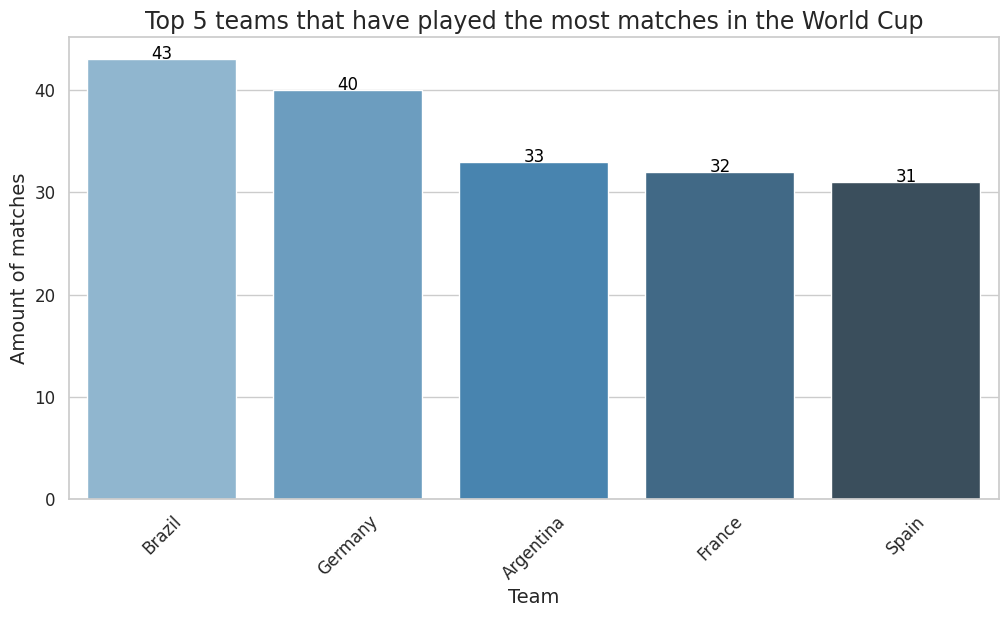

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_5_teams, x='team', y='count', palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel('Team', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Amount of matches', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Top 5 teams that have played the most matches in the World Cup', fontsize=17)
for index, row in top_5_teams.iterrows():
    barplot.text(index, row['count'], row['count'], color='black', ha="center")
plt.show()

#### Insights and conclusion

In this journey through the data and statistics, it was found that **four out of the top five teams with the most World Cup participations are the same teams that have lifted the trophy multiple times**. This represents an almost perfect alignment between history and success. However, **the surprise comes with Spain, which ranks fifth in terms of matches played**, despite having won only once in South Africa 2010. **Italy also stands out**, with its four World Cup victories, yet **it does not appear in the top 5 teams with the most matches in the history of the tournament**.
<br><br>
So, with only one team challenging the expectations, we find ourselves at a crossroads, and we **lean towards H<sub>0</sub>**.
<br><br>
As an insight, FIFA could take these findings as a call to action, an opportunity to organize a special tournament among these powerful teams to determine who is the true soccer king. An epic showdown that could rewrite history once again and give rise to a new legend in the beautiful game of this sport. Are we ready to witness the next feat on the battlefield? Only time will tell.

### 6.2. Goals in Friendly Matches

#### Hypothesis

Friendly matches, those encounters where passion and competition merge with camaraderie and fun, deserve a separate analysis. As teams prepare for important events or simply aim to entertain their fans, these games become a unique stage.
<br><br>
The analysis leads us to question whether, in these moments of relaxation and experimentation, goals flow more freely. Could it be possible that friendly matches are the home of a goal-scoring extravaganza?
<br><br>
- Thus, there are two possibilities. The null hypothesis **H<sub>0</sub>** suggests that friendly matches are not necessarily the kings of goals.
- The alternative hypothesis **H<sub>1</sub>** allows us to assert the opposite: that more goals are scored in these matches than in any other tournament.

Let's see what the data tells us.

#### Development

First, let's calculate the total amount of goals per tournament:

In [ ]:
df_soccer_modified_case_2 = df_soccer_modified.groupby('tournament')[['home_team_score', 'away_team_score']].sum().reset_index()
df_soccer_modified_case_2['total_goals'] = df_soccer_modified_case_2['home_team_score'] + df_soccer_modified_case_2['away_team_score']
df_soccer_modified_case_2

,tournament,home_team_score,away_team_score,total_goals
0,ABCS Tournament,10,5,15
1,AFC Asian Cup,341,301,642
2,AFC Asian Cup qualification,1144,629,1773
3,AFC Challenge Cup,142,124,266
4,AFC Challenge Cup qualification,165,96,261
5,AFF Championship,614,354,968
6,AFF Championship qualification,4,1,5
7,African Cup of Nations,640,481,1121
8,African Cup of Nations qualification,1987,1029,3016
9,African Nations Championship,288,207,495


Let's order by the amount of goals and keep the top 5 only:

In [ ]:
top_5_total_goals = df_soccer_modified_case_2.nlargest(5, 'total_goals')
top_5_total_goals

,tournament,home_team_score,away_team_score,total_goals
38,Friendly,12957,8535,21492
37,FIFA World Cup qualification,9720,6155,15875
73,UEFA Euro qualification,2757,2053,4810
8,African Cup of Nations qualification,1987,1029,3016
2,AFC Asian Cup qualification,1144,629,1773


Let's see the result with a bar chart (in this case, a **univariate analysis chart**):

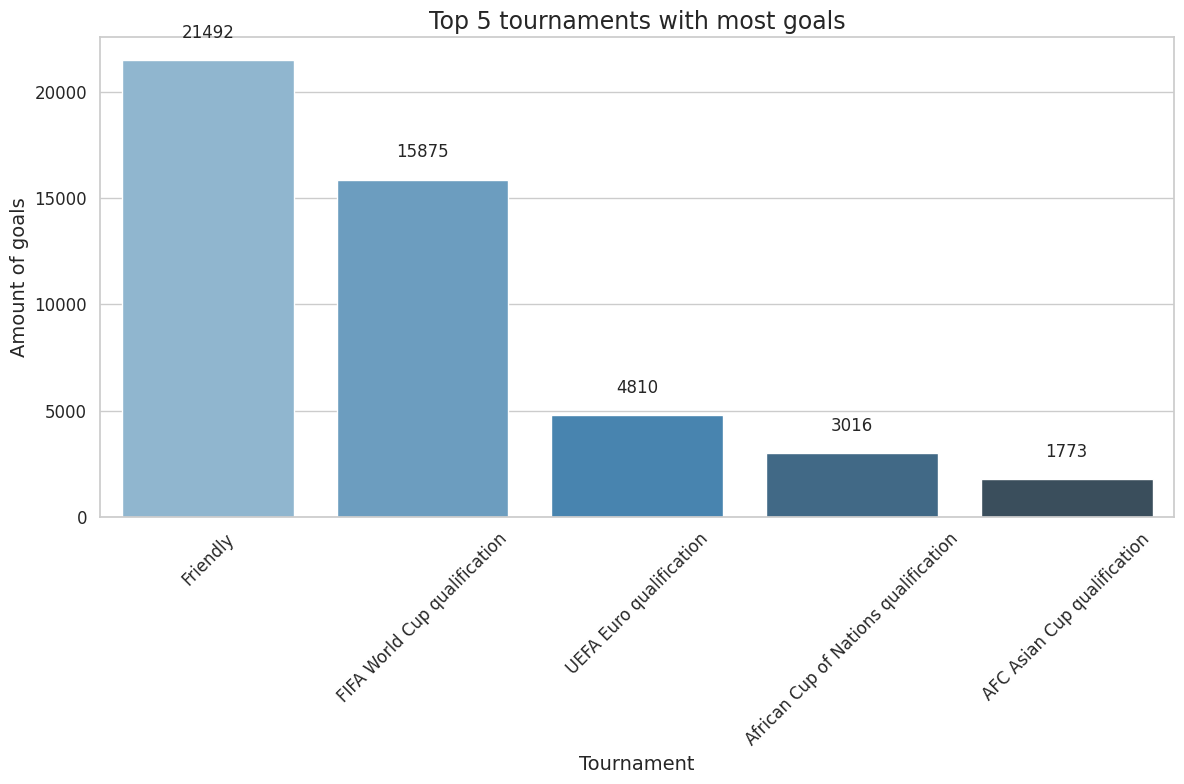

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_5_total_goals, x='tournament', y='total_goals', palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel('Tournament', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Amount of goals', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Top 5 tournaments with most goals', fontsize=17)
# Adding labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        barplot.annotate('{:.0f}'.format(height),
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 13),  # 3 points of vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
autolabel(barplot.patches)
plt.tight_layout()
plt.show()

#### Insights and conclusion

This analysis revealed a rather decisive truth. With a overwhelming difference, international friendly matches stand as the undisputed kings of goals. The excitement and freedom that characterize these matches translate into a goal-scoring spectacle like no other. Therefore, we **lean towards H<sub>1</sub>**.
<br><br>
Friendly matches and tournaments tend to be less competitive and more focused on showcasing and experimenting with the sport. This indicates that teams take more risks and tend to be more offensive than defensive in these types of tournaments and matches, leading to a much higher number of goal-scoring opportunities and goals scored than in official tournaments, adding greater value to entertainment for fans.
<br><br>
The result is a delight for fans, who enjoy a feast of goals and excitement in each of these matches. So, as long as teams continue to seek a balance between entertainment and competition in friendly matches, soccer enthusiasts can be sure that the magic of goals will never cease to shine in this special corner of the sport.

### 6.3. Amount of matches by weekday

#### Hypothesis

In the vibrant soccer universe, where fans eagerly await each match as if it were a chapter of an exciting novel, there is a mystery that has piqued the curiosity of many. The question is simple but intriguing: **which day of the week does soccer unfold in all its glory?** Many fans assume it's Sunday, when crowds gather to enjoy the matches. But let's check in the dataset to explore beyond appearances and reveal the truth behind soccer weekdays.
<br><br>
As in previous cases, two hypotheses are presented that will challenge the fans expectations.
- On one hand, **H<sub>1</sub>** suggests that Sunday is the day of the week with the most matches played
- On the other hand, **H<sub>0</sub>** invites us to consider that there is another day of the week, not Sunday, where more soccer matches are concentrated.

But what do the data tell us? Let's see it below.

#### Development

Let's group matches by weekday:

In [ ]:
df_soccer_modified_case_3 = df_soccer_modified['weekday'].value_counts().reset_index().rename(columns={'index': 'weekday', 'weekday': 'matches'})
df_soccer_modified_case_3

,weekday,matches
0,Wednesday,5743
1,Saturday,4611
2,Sunday,4175
3,Tuesday,3324
4,Friday,2622
5,Thursday,2029
6,Monday,1417


Let's order the week, from Sunday to Saturday:

In [ ]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_soccer_modified_case_3['weekday'] = pd.Categorical(df_soccer_modified_case_3['weekday'], categories=weekday_order, ordered=True)
df_soccer_modified_case_3 = df_soccer_modified_case_3.sort_values('weekday')
df_soccer_modified_case_3

,weekday,matches
2,Sunday,4175
6,Monday,1417
3,Tuesday,3324
0,Wednesday,5743
5,Thursday,2029
4,Friday,2622
1,Saturday,4611


Let's see the results with a bar chart (in this case, a **univariate analysis chart**):

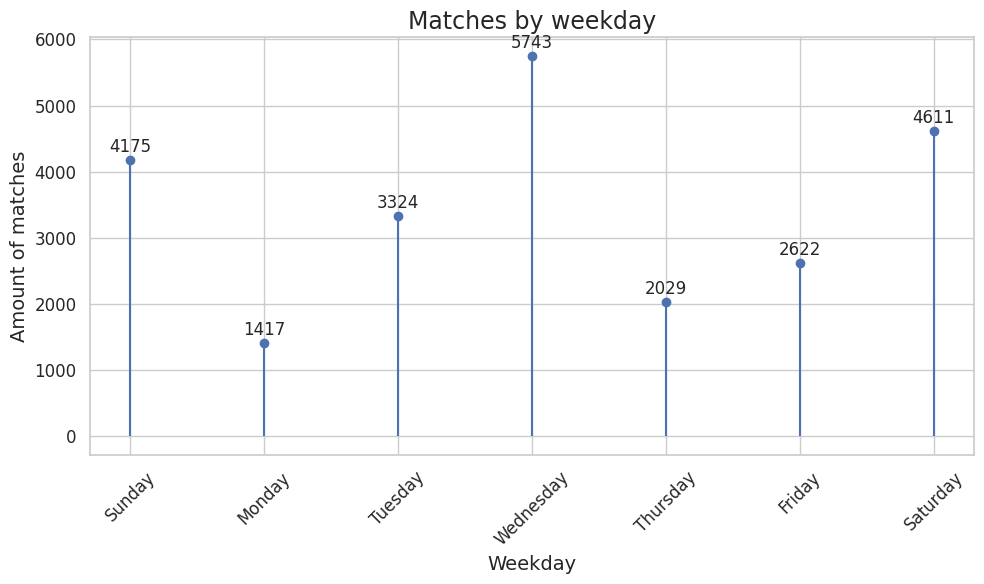

In [ ]:
# Using a Stem to vary
plt.figure(figsize=(10, 6))
plt.stem(df_soccer_modified_case_3['weekday'], df_soccer_modified_case_3['matches'], basefmt=' ')
plt.xlabel('Weekday', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Amount of matches', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Matches by weekday', fontsize=17)

# Add labels to each day
for x, y in zip(df_soccer_modified_case_3['weekday'], df_soccer_modified_case_3['matches']):
    plt.annotate(text=str(y), xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Insights and conclusion

As the data is analyzed, it was found a surprise that challenged our beliefs. Wednesday, a day often perceived as the midpoint of the weekly routine, emerged as the true king of soccer matches. Yes, as you read it, Wednesday stole the spotlight. Therefore, we **lean towards H<sub>0</sub>**.
<br><br>
This curious finding leads us to reflect on the reasons behind this choice. Why Wednesday? It could be that, being exactly in the middle of the week, this day provides a perfect break for fans who yearn for a pause from their daily routines. An opportunity to immerse themselves in the exciting world of soccer midweek.
<br><br>
This revealing data is not only of interest to fans but also to broadcasters and organizers, who might consider strategically scheduling their events on this weekday. Wednesday becomes a soccer rendezvous, where the audience and excitement peak.
<br><br>
So, the next time you look at your schedule or calendar and see that it's Wednesday, remember that it's the day when soccer takes center stage.

### 6.4. Relationship between FIFA Ranking and amount of scored goals

#### Hypothesis

Is there a relationship between the home team FIFA ranking and the number of goals they manage to score in their matches? Let's unravel this mystery and discover if there is a hidden connection between the ranking and goal-scoring effectiveness.
<br><br>
Once again, the scenario is set with two hypotheses in mind.
- The first hypothesis, **H<sub>0</sub>**, asserts that there is no correlation between the goals scored and the home teams FIFA ranking.
- The second hypothesis, **H<sub>1</sub>**, invites us to consider the possibility that there is a significant relationship between these two factors.

As usual, let's use the data to support one of the two alternatives.

#### Development

For this case, let's use home_team_fifa_rank and home_team_score values, and graph the result with a scatter plot (a **bivariate analysis chart**):

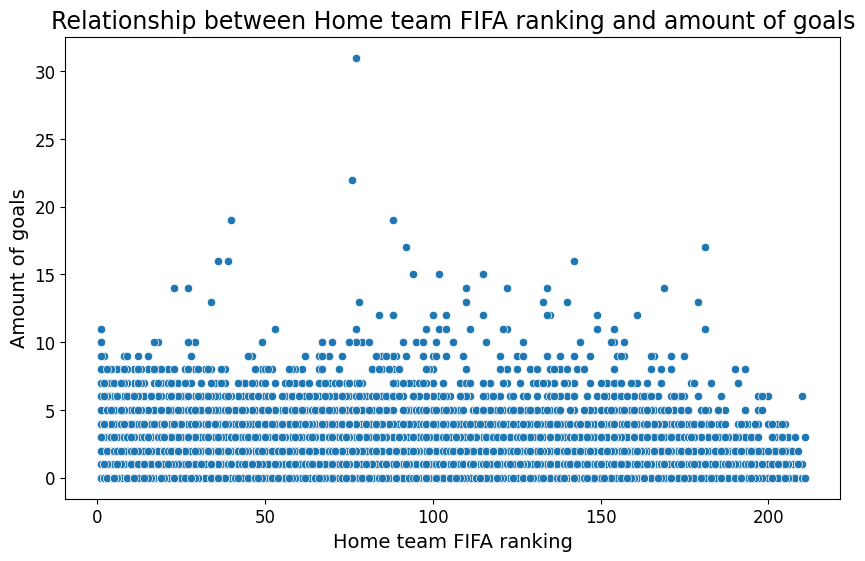

In [ ]:
# Using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_soccer_modified, x="home_team_fifa_rank", y="home_team_score")
plt.xlabel('Home team FIFA ranking', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Amount of goals', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Relationship between Home team FIFA ranking and amount of goals', fontsize=17)

# Show the results
plt.show()

There doesn't seem to be any relationship, but let's analyze this by calculating the correlation coefficient.

In [ ]:
correlation = df_soccer_modified["home_team_fifa_rank"].corr(df_soccer_modified["home_team_score"])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.1276671378886703


As the data is explored and statistics analyzed, it is found a surprising result. The correlation coefficient reveals a number astonishingly close to zero (0): -0.12. This places us on the edge of null correlation, meaning that there is no significant relationship between the FIFA ranking of home teams and the number of goals they score in their matches.

Let's perform an additional analysis, by counting the number of goals for each country and their FIFA ranking.

In [ ]:
# Unique list of teams
teams = pd.concat([df_soccer_modified['home_team'], df_soccer_modified['away_team']]).unique()

# Total goals per team
total_goals_by_team = {}

for country in teams:
    home_goals = df_soccer_modified[df_soccer_modified['home_team'] == country]['home_team_score'].sum()
    away_goals = df_soccer_modified[df_soccer_modified['away_team'] == country]['away_team_score'].sum()
    total_goals = home_goals + away_goals
    total_goals_by_team[country] = total_goals

# Dataframe with goals per country (team)
df_goals_ranking = pd.DataFrame(total_goals_by_team.items(), columns=['Team', 'Total goals'])
# Adding the ranking
df_goals_ranking['Ranking'] = df_goals_ranking['Team'].apply(lambda x: df_soccer_modified.loc[df_soccer_modified['home_team'] == x, 'home_team_fifa_rank'].sum() +
                                                               df_soccer_modified.loc[df_soccer_modified['away_team'] == x, 'away_team_fifa_rank'].sum())

Let's sort from highest to lowest to see the teams that have scored the most goals.

In [ ]:
df_goals_ranking = df_goals_ranking.sort_values(by='Total goals', ascending=False)
df_goals_ranking

,Team,Total goals,Ranking
1,Brazil,954,1362
46,Germany,875,2525
32,Mexico,858,7499
28,Spain,781,1918
39,Japan,776,14480
31,Saudi Arabia,762,24870
51,USA,761,9325
54,IR Iran,713,16495
48,Netherlands,700,3375
36,Korea Republic,685,17853


Observe that the teams with the most scored goals are not necessarily at the top of the FIFA Ranking. Let's visualize the goals for each team on a map:

In [ ]:
# Creating a map with goals for each country
fig = px.choropleth(
    df_goals_ranking,
    locations="Team",
    locationmode="country names",
    color="Total goals",
    hover_name="Team",
    color_continuous_scale="Viridis",
    projection="natural earth"
)

# Increase the title size
fig.update_layout(
    title_text="Scored goals by each team",
    title_x=0.5,  # Adjusts the horizontal position of the title
    title_font=dict(size=17)  # Adjusts the title size
)

# Show the map
fig.show()

In this way, it can be observed that there is no direct relationship between FIFA ranking and scored goals by team.

#### Insights and conclusion

As it was observed from the graph and the correlation coefficient, there is no direct relationship; therefore, we conclude that **the null hypothesis H<sub>0</sub> is correct**.
<br><br>
This finding leads us to reflect on the inherent complexity of soccer, indicating that we are dealing with a multifaceted and inherently complex sport. While the FIFA ranking may offer a measure of the relative strength of a team, it clearly is not the sole determining factor of its ability to score goals. Soccer is a multifaceted sport, where tactics, individual performance, the quality of the opponent, and specific match circumstances intertwine in a chaotic ballet that shapes the scorelines.
<br><br>
So, as long as soccer continues to challenge our expectations and break the rules of statistics, fans will continue to marvel at the magic of this sport. Because on the field, surprises and unexpected moments are as valuable as the goals themselves, reminding us that soccer is much more than numbers and rankings.

### 6.5. Relationship between FIFA Ranking and amount of matches won

#### Hypothesis

In the vast battlefield of international soccer, where national teams strive for glory in every match, there's a fascinating question that emerges among the crowd of passionate fans: Is there a connection between the number of matches won by a team and its position in the FIFA ranking? Let's explore this enigma and discover if victory on the field translates to a higher rank in the world.
<br><br>
In this quest for truth, once again, there are two hypotheses that will lead us through a path of data and graphs.
- The first one, the null hypothesis **H<sub>0</sub>**, challenges the idea that there is a relationship between the FIFA ranking and matches won by a team, stating that there is no connection between FIFA ranking and matches won by a team.
- The second, the alternative hypothesis **H<sub>1</sub>**, suggests that as a team wins more matches, its position in the FIFA ranking rises.

Let's check this with numbers and graphs.

#### Development

Let's generate an auxiliary dataframe for this case:

In [ ]:
df_soccer_modified_case_5 = df_soccer_modified

Calculate the ranking of each selection:

In [ ]:
team_ranking = pd.DataFrame()
team_ranking['team_name'] = pd.concat([df_soccer_modified_case_5['home_team'], df_soccer_modified_case_5['away_team']]).unique()
team_ranking['ranking'] = team_ranking['team_name'].apply(lambda x: df_soccer_modified_case_5.loc[df_soccer_modified_case_5['home_team'] == x, 'home_team_fifa_rank'].sum() +
                                                               df_soccer_modified_case_5.loc[df_soccer_modified_case_5['away_team'] == x, 'away_team_fifa_rank'].sum())
team_ranking

,team_name,ranking
0,Bolivia,19683
1,Brazil,1362
2,Ecuador,14390
3,Guinea,18027
4,Paraguay,11320
5,Peru,15255
6,Zimbabwe,26499
7,Faroe Islands,25064
8,Sweden,7969
9,Australia,14757


Calculate the number of matches won by selection:

In [ ]:
matches_won_home = df_soccer_modified_case_5[df_soccer_modified_case_5['home_team_result'] == 'Win']['home_team'].value_counts()
matches_won_away = df_soccer_modified_case_5[df_soccer_modified_case_5['home_team_result'] == 'Lose']['away_team'].value_counts()
matches_won = matches_won_home.add(matches_won_away, fill_value=0)
matches_won

Afghanistan                        31.0
Albania                            76.0
Algeria                           136.0
American Samoa                      4.0
Andorra                            11.0
Angola                            111.0
Anguilla                            2.0
Antigua and Barbuda                48.0
Argentina                         216.0
Armenia                            59.0
Aruba                              11.0
Australia                         162.0
Austria                           108.0
Azerbaijan                         46.0
Bahamas                            11.0
Bahrain                           148.0
Bangladesh                         43.0
Barbados                           56.0
Belarus                            79.0
Belgium                           159.0
Belize                             18.0
Benin                              52.0
Bermuda                            33.0
Bhutan                              7.0
Bolivia                            64.0


Merge both dataframes:

In [ ]:
team_stats = pd.DataFrame({'team_name': team_ranking['team_name'],
                           'ranking': team_ranking['ranking']})
team_stats

,team_name,ranking
0,Bolivia,19683
1,Brazil,1362
2,Ecuador,14390
3,Guinea,18027
4,Paraguay,11320
5,Peru,15255
6,Zimbabwe,26499
7,Faroe Islands,25064
8,Sweden,7969
9,Australia,14757


Let's add the won matches column:

In [ ]:
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: matches_won[x] if x in matches_won else 0)
team_stats = team_stats.sort_values(by='ranking', ascending=True)
team_stats

,team_name,ranking,matches_won
1,Brazil,1362,301.0
28,Spain,1918,246.0
13,Argentina,2319,216.0
46,Germany,2525,240.0
45,France,3049,230.0
47,Italy,3118,194.0
21,England,3308,196.0
48,Netherlands,3375,201.0
50,Portugal,3442,198.0
200,Turks and Caicos Islands,5201,5.0


Once again, let's use a scatter plot to check the relationship between FIFA ranking and the amount of matches won (a **bivariate analysis graph**):

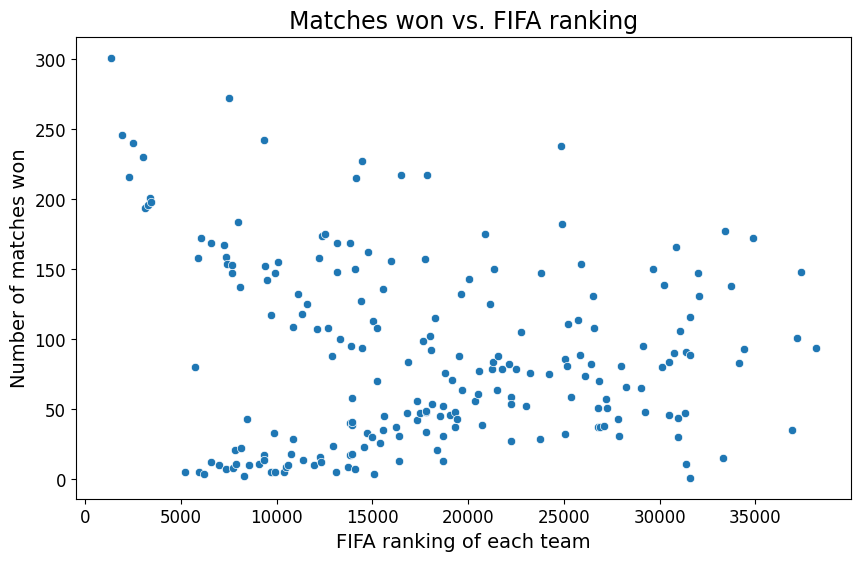

In [ ]:
# Use a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_stats, x='ranking', y='matches_won')
plt.xlabel('FIFA ranking of each team', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Number of matches won', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Matches won vs. FIFA ranking', fontsize=17)
# Muestro el gráfico
plt.show()

The correlation coefficient is:

In [ ]:
# Calculate the correlation coefficient between FIFA ranking and matches won
correlation = team_stats['ranking'].corr(team_stats['matches_won'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Coeficiente de correlación: -0.12800096618072224


Again, it was found here a correlation coefficient clinging stubbornly to zero (0). What does this mean? In simple terms, we're talking about a null correlation, an absence of an apparent relationship between the FIFA ranking and the amount of matches won. Thus, let's conclude that the null hypothesis **H<sub>0</sub>** is the right one, which is somewhat perplexing... 🤔
<br><br>
The result, though perplexing, leads us to a crossroads. But let's not stop with this as a conclusion; our 90 minutes in this analysis are not over yet, let's take an additional step. What if we examine more closely the top 10 and the bottom 10 FIFA-ranked teams? Could we find any indication of a relationship between victory on the field and their privileged and disadvantaged positions, respectively? Let's delve into this territory of extreme teams (top 10 and bottom 10 of the ranking) and find out if this select group holds any surprises in its relationship with matches won.

Let's calculate the top 10 and bottom 10 of the FIFA ranking:

In [ ]:
team_stats = team_stats.sort_values(by='ranking', ascending=True)
top_10_teams = team_stats.head(10)
bottom_10_teams = team_stats.tail(10)

The top 10:

In [ ]:
top_10_teams

,team_name,ranking,matches_won
1,Brazil,1362,301.0
28,Spain,1918,246.0
13,Argentina,2319,216.0
46,Germany,2525,240.0
45,France,3049,230.0
47,Italy,3118,194.0
21,England,3308,196.0
48,Netherlands,3375,201.0
50,Portugal,3442,198.0
200,Turks and Caicos Islands,5201,5.0


The bottom 10:

In [ ]:
bottom_10_teams

,team_name,ranking,matches_won
57,Liechtenstein,33296,15.0
82,Qatar,33415,177.0
95,Kuwait,33715,138.0
74,Tanzania,34140,83.0
17,Estonia,34415,93.0
85,Oman,34875,172.0
64,Malta,36922,35.0
165,Singapore,37179,101.0
126,Bahrain,37375,148.0
120,Malaysia,38142,94.0


Let's create a single dataset with these 20 selected teams:

In [ ]:
selected_teams = pd.concat([top_10_teams, bottom_10_teams])
selected_teams

,team_name,ranking,matches_won
1,Brazil,1362,301.0
28,Spain,1918,246.0
13,Argentina,2319,216.0
46,Germany,2525,240.0
45,France,3049,230.0
47,Italy,3118,194.0
21,England,3308,196.0
48,Netherlands,3375,201.0
50,Portugal,3442,198.0
200,Turks and Caicos Islands,5201,5.0


Let's see its plot:

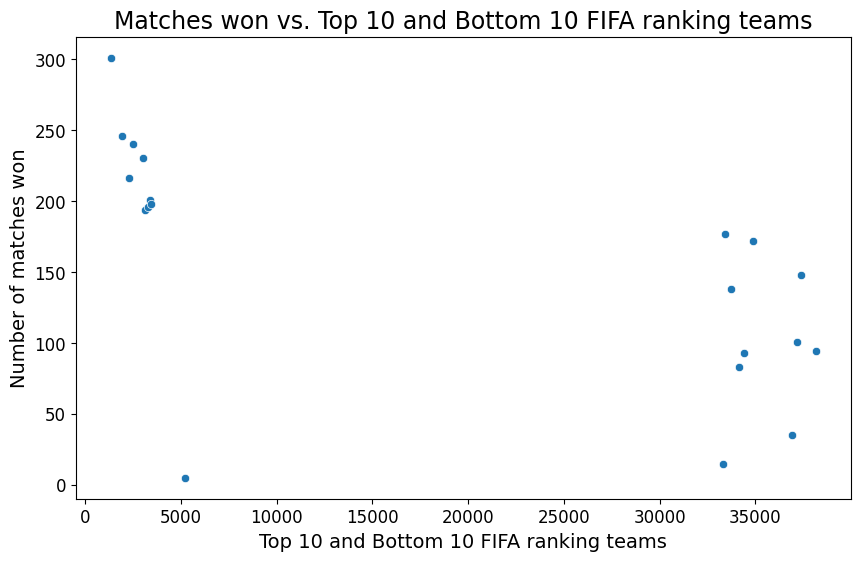

In [ ]:
# Again, a scatter plot but only with the top 10 and bottom 10 teams of the FIFA ranking
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_teams, x='ranking', y='matches_won')
plt.xlabel('Top 10 and Bottom 10 FIFA ranking teams', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Number of matches won', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Matches won vs. Top 10 and Bottom 10 FIFA ranking teams', fontsize=17)

# Show the graph
plt.show()

In [ ]:
# Calculate the correlation coefficient for these selections:
correlation = selected_teams['ranking'].corr(selected_teams['matches_won'])

# Print the value
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.6363905548637317


#### Insights and Conclusion

The story takes an intriguing turn when we decide to focus exclusively on the select group of the top 10 and bottom bottom 10 FIFA-ranked teams. Here, the numbers reveal a different narrative. The correlation coefficient, approximately -0.64, shows a negative correlation, meaning that **the more matches a team has won, the higher it is in the FIFA ranking (and vice versa)**. Thus, in this final analysis, we stick with **H<sub>1</sub>**.
<br><br>
This finding reinforces the idea that success in terms of victories is not a mere illusion but a true driver of the ranking. Teams that demonstrate consistent performance, accumulating victories over time, are better positioned to reach the coveted top positions in the FIFA ranking.
<br><br>
This analysis is not only a revelation for soccer enthusiasts but also a valuable lesson for teams aspiring to improve their ranking and performance. Those seeking to climb the FIFA ranking can establish the number of victories in matches played as their primary goal. The recipe for success is clear: win, win, and win. The *Jogo bonito* embellishes it, but it is merely an addition if the goal is to be at the top of the FIFA ranking...

### 6.6. The "Home Field Advantage" - Is there truly an influence for a team when playing at home?

#### Hypothesis

Soccer has been steeped in the common belief that playing at home provides an undeniable advantage. The history of the sport is full of examples where home teams have triumphed in their stadiums, fueled by the support of their fans and an unparalleled familiarity with local conditions. However, we have also witnessed iconic moments where home advantage does not guarantee victory, such as the legendary "Maracanazo," where the Uruguay national team secured victory in the final match of the 1950 FIFA World Cup, defeating the Brazil national football team 2-1 at the imposing Maracanã stadium in Rio de Janeiro, Brazil. This analysis seeks to shed light on the enigma of home-field advantage in this sport.
<br><br>
Let's formulate two hypotheses that challenge common perceptions about home-field advantage.
- The first one, **H<sub>0</sub>**, suggests that playing at home does not confer a significant advantage in terms of victory.
- The second one, **H<sub>1</sub>**, bets on the positive influence of playing at home.

Let's check this with numbers and graphics.

#### Development

Now, let's create an auxiliary dataset for this case:

In [ ]:
df_soccer_modified_case_6 = df_soccer_modified

Calculate the occurrences for each value in the home_team_result column:

In [ ]:
home_team_result_counts = df_soccer_modified_case_6['home_team_result'].value_counts()
home_team_result_counts

Win     11761
Lose     6771
Draw     5389
Name: home_team_result, dtype: int64

Now, let's use a simple Pie Chart to visualize the distribution of data in the "home_team_result" column (using a **univariate analysis chart**):

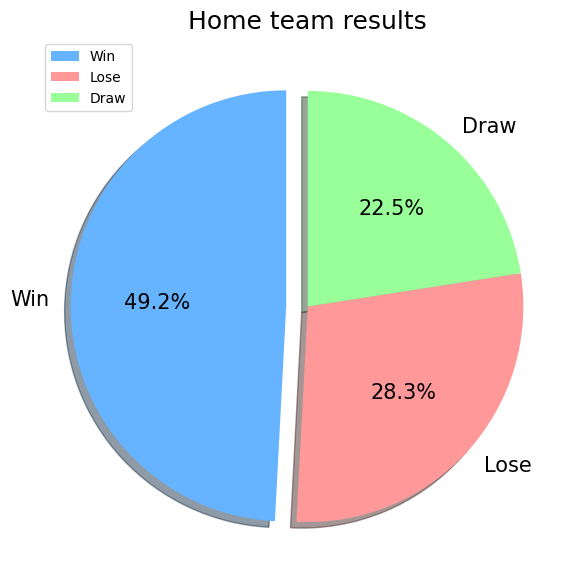

In [ ]:
# Using a pie chart
plt.figure(figsize=(9, 7))
colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0.1, 0, 0)

patches, texts, autotexts = plt.pie(home_team_result_counts, labels=home_team_result_counts.index,
        colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Change the font size of the labels
for label in texts:
    label.set_fontsize(15)

# Change the font size of the percentages
for autotext in autotexts:
    autotext.set_fontsize(15)

plt.title('Home team results', fontsize=18)
plt.legend(home_team_result_counts.index, loc='upper left')

# Show the plot
plt.show()

When analyzing the data, it is observed that the percentage of victories for the home teams surpasses the percentages of losses and draws, suggesting a positive influence of playing at home.

However, when considering a broader distribution of "victories vs. non-victories (losses + draws)," it is found a balanced outcome, where the latter remains at 50.8%.

This finding indicates that, despite the numbers supporting the positive influence of playing at home, victory is not guaranteed. It seems that home advantage may not be the determining factor in the outcome of a match, and thus, we could **lean towards accepting the null hypothesis (H<sub>0</sub>)**.
<br><br>
<br><br>
**An Unexpected Turn**

But what happens if we strategically select national teams that, due to extraneous factors, may be favored in their home matches? Let's chose eight countries, each with an extra-footballistic factor that could influence their performance at home. These are:
1. **Bolivia**: Due to the high altitude of the city of La Paz, playing at home gives them an advantage due to the lack of oxygen, which makes it difficult for teams to adapt.
2. **Ecuador**: Quito is also at high altitude, and the lack of oxygen can affect visiting teams.
3. **México**: The altitude of Mexico City can affect teams not accustomed to playing at that altitude.
4. **Argentina**: The climate and conditions in cities like Buenos Aires, Córdoba, and Mendoza can favor local players who are accustomed to these conditions. The support of the local crowd can also be a fundamental factor favoring the home team.
5. **Rusia**: The dimensions of Russian stadiums and the cold climate can be challenging for teams not accustomed to playing in these conditions.
6. **Camerún**: The heat and humidity in some Cameroonian cities can affect visiting teams.
7. **Australia**: The climate and the time zone difference can affect teams traveling from the Northern Hemisphere.
8. **Ghana**: The heat and humidity in some parts of Ghana can be challenging for visiting teams.

Let's analyze this case.

Let's create a dataset with the selected countries only:

In [ ]:
selected_local_teams = ['Bolivia', 'Ecuador', 'Mexico', 'Argentina',
               'Russia', 'Cameroon', 'Australia', 'Ghana']
df_soccer_modified_case_6_local = df_soccer_modified_case_6[df_soccer_modified_case_6['home_team'].isin(selected_local_teams)]
df_soccer_modified_case_6_local.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,month,weekday
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,1,FIFA World Cup qualification,Sydney,Australia,False,Yes,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
11,1993-08-15,Bolivia,Ecuador,South America,South America,59,35,0,0,1,0,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
16,1993-08-22,Bolivia,Venezuela,South America,South America,59,94,0,0,7,0,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
22,1993-08-29,Argentina,Paraguay,South America,South America,5,67,0,0,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,8,Sunday
27,1993-09-05,Argentina,Colombia,South America,South America,5,19,0,0,0,5,FIFA World Cup qualification,Buenos Aires,Argentina,False,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,9,Sunday
29,1993-09-05,Ecuador,Uruguay,South America,South America,35,22,0,0,0,1,FIFA World Cup qualification,Guayaquil,Ecuador,False,No,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,9,Sunday
50,1993-09-19,Ecuador,Bolivia,South America,South America,35,59,0,0,1,1,FIFA World Cup qualification,Guayaquil,Ecuador,False,No,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,1993,9,Sunday


Let's count their victories, draws, and losses when playing home matches:

In [ ]:
home_team_result_counts_selected = df_soccer_modified_case_6_local['home_team_result'].value_counts()
home_team_result_counts_selected

Win     837
Draw    307
Lose    258
Name: home_team_result, dtype: int64

Let's see the results again with a Pie Chart (**using a univariate analysis graph**):

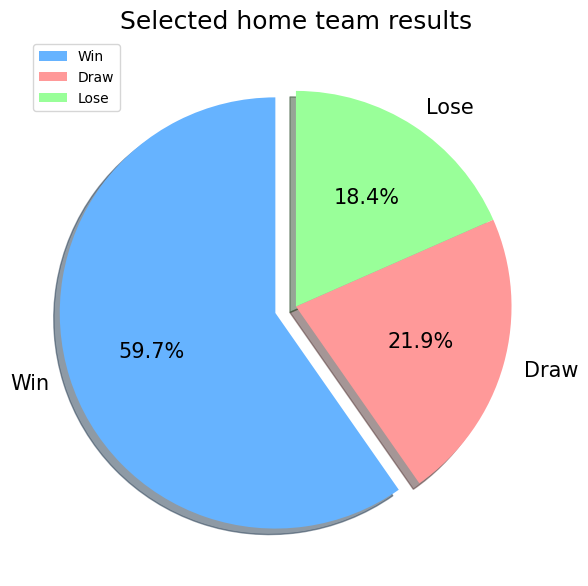

In [ ]:
# Using a pie chart
plt.figure(figsize=(9, 7))
colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0.1, 0, 0)

patches, texts, autotexts = plt.pie(home_team_result_counts_selected, labels=home_team_result_counts_selected.index,
        colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Change the font size of the labels
for label in texts:
    label.set_fontsize(15)

# Change the font size of the percentages
for autotext in autotexts:
    autotext.set_fontsize(15)

plt.title('Selected home team results', fontsize=18)
plt.legend(home_team_result_counts_selected.index, loc='upper left')

# Show the plot
plt.show()

#### Insights and conclusion

The analysis revealed that, when focusing on these teams, the percentage of victories for home teams significantly increases, reaching an impressive 59.7%.
<br><br>
With this, it was discovered that by selecting teams that may benefit from extraneous factors, the home advantage becomes even stronger, almost guaranteeing a victory for the home teams.

This reinforces the idea that home-field advantage in soccer is not just a myth but a reality that can influence the outcome of a match. Fan passion, deep knowledge of local conditions, and other extraneous factors can tip the scales in favor of teams playing at home. Therefore, we reverse our decision and stick with hypothesis **H<sub>1</sub>** for this case.
<br><br>
In summary, home-field advantage in soccer is a complex phenomenon that should not be underestimated. While it doesn't guarantee victory in every case, when combined with extraneous factors, it can become a powerful weapon that tilts the balance toward success.

### 6.7. Additional Bivariate Analysis

#### 6.7.1. Correlation matrix

Let's visualize the relationship between numerical variables using this heatmap:

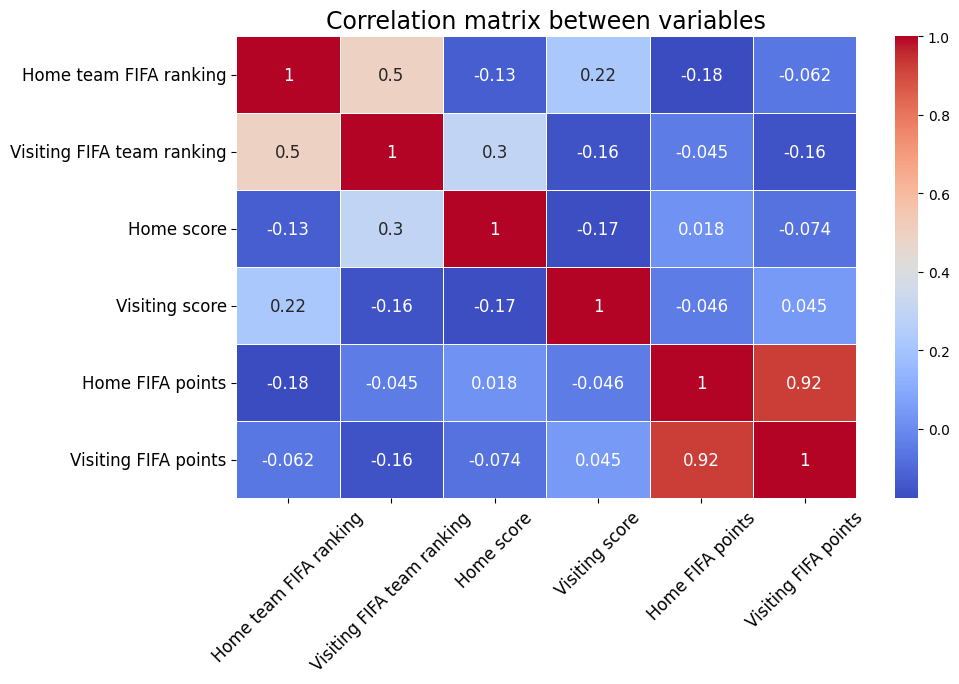

In [ ]:
correlation_matrix = df_soccer_modified[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_score', 'away_team_score', 'home_team_total_fifa_points', 'away_team_total_fifa_points']].corr()
# Custom names for variables
variable_names = {
    'home_team_fifa_rank': 'Home team FIFA ranking',
    'away_team_fifa_rank': 'Visiting FIFA team ranking',
    'home_team_score': 'Home score',
    'away_team_score': 'Visiting score',
    'home_team_total_fifa_points': 'Home FIFA points',
    'away_team_total_fifa_points': 'Visiting FIFA points'}
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths = 0.5, annot_kws={"size": 12})
# Changing the names of variables on the x and y axes
heatmap.set_xticklabels([variable_names[col] for col in correlation_matrix.columns], fontsize=12, rotation=45)
heatmap.set_yticklabels([variable_names[col] for col in correlation_matrix.index], fontsize=12)
plt.title('Correlation matrix between variables', fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Adjusting the font size of the color scale

plt.show()

The numbers reveal a couple of interesting truths. When a team scores more goals, its FIFA score tends to rise. And as FIFA points increase, the team's ranking improves, approaching the coveted top position.
<br><br>
Although soccer is unpredictable, these connections between goals, FIFA points, and rankings show us that performance on the field and international status are interconnected in some way.

### 6.8. Additional multivariate analysis

#### 6.8.1. Pairwise comparison (Pairplot)

Let's explore relationships between pairs of numerical variables using scatter plots:

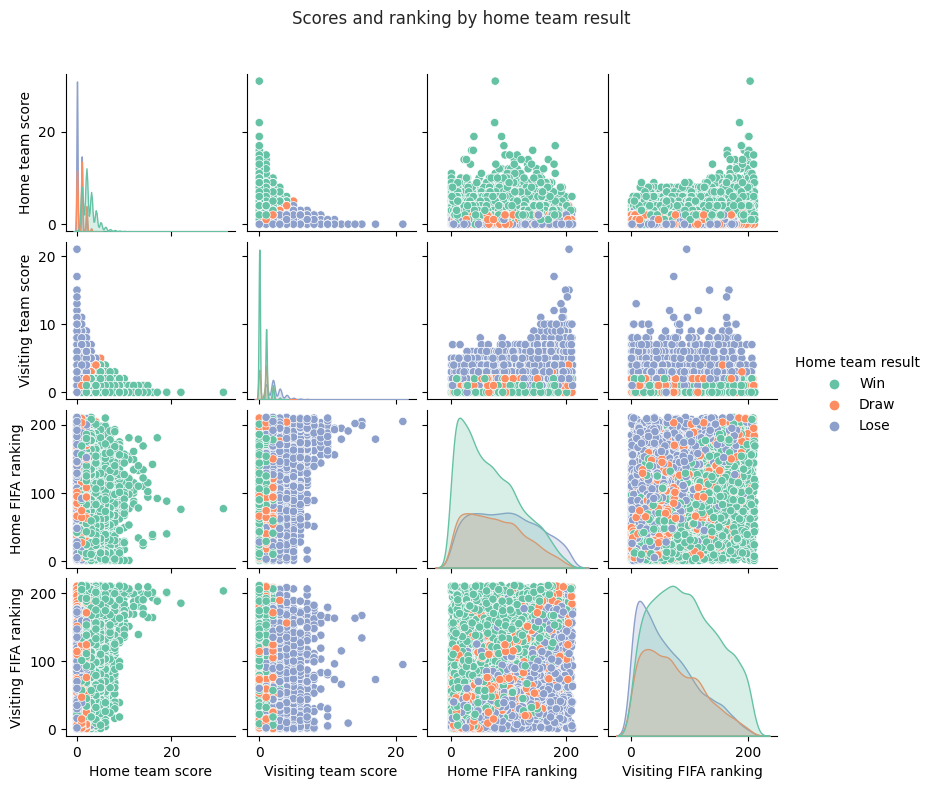

In [ ]:
# Modify column labels
df_pairplot = df_soccer_modified[['home_team_result', 'home_team_score', 'away_team_score', 'home_team_fifa_rank', 'away_team_fifa_rank']]

# Renaming the columns
df_pairplot = df_pairplot.rename(columns={
    'home_team_result': 'Home team result',
    'home_team_score': 'Home team score',
    'away_team_score': 'Visiting team score',
    'home_team_fifa_rank': 'Home FIFA ranking',
    'away_team_fifa_rank': 'Visiting FIFA ranking'
})

pairplot = sns.pairplot(df_pairplot, hue='Home team result', height=2, palette='Set2')
sns.set(font_scale=1.5)
pairplot.fig.suptitle('Scores and ranking by home team result', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.show()

It can be observed that:
- When the home team secures victory, the goals scored by the home team are always greater than the goals scored by the away team (and vice versa).
- The better the ranking of the home team, the more matches it has won.
- The better the ranking of the away team, the more matches it has won.



#### 6.8.2. Average goals over time

Let's see how some characteristics change over time using line or bar graphs, for example the trend of goals over time:

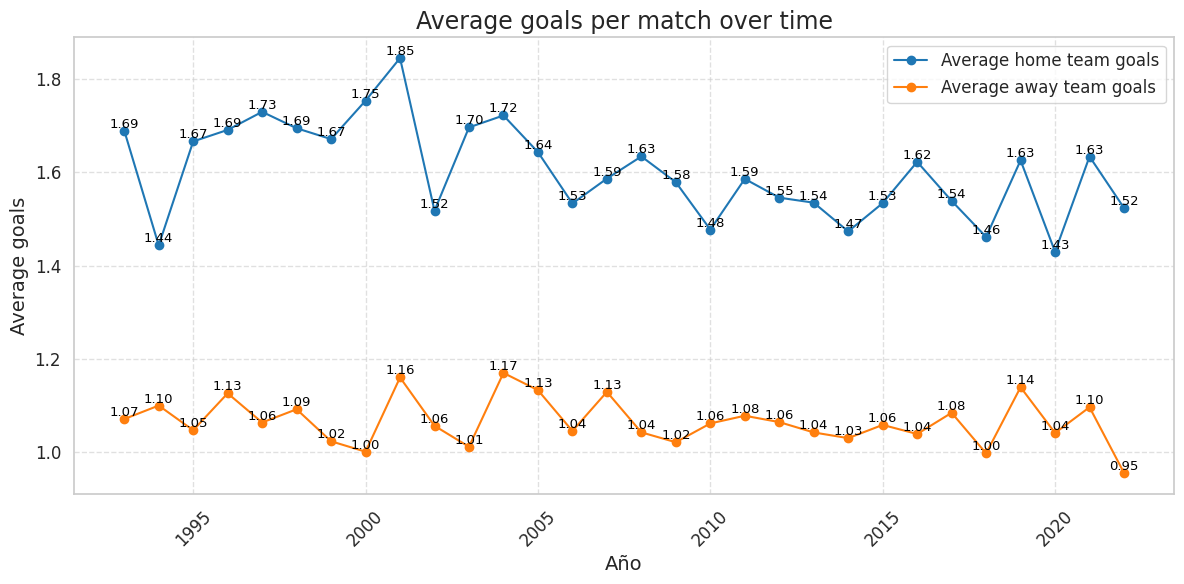

In [ ]:
# Convert the 'year' column to datetime format
df_soccer_modified['year'] = pd.to_datetime(df_soccer_modified['year'], format='%Y')
# Group and calculate the average goals per year
goals_by_year = df_soccer_modified.groupby(df_soccer_modified['year'].dt.year)[['home_team_score', 'away_team_score']].mean()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# Line plot for the average goals of the home team
plt.plot(goals_by_year.index, goals_by_year['home_team_score'], label='Average home team goals', marker='o', color='#1f77b4')
# Line plot for the average goals of the away team
plt.plot(goals_by_year.index, goals_by_year['away_team_score'], label='Average away team goals', marker='o', color='#ff7f0e')

plt.title('Average goals per match over time', fontsize=17)
plt.xlabel('Año', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.ylabel('Average goals', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)
# Add labels to data points
for x, y1, y2 in zip(goals_by_year.index, goals_by_year['home_team_score'], goals_by_year['away_team_score']):
    plt.text(x, y1, f'{y1:.2f}', ha='center', va='bottom', fontsize=9.5, color='#000000')
    plt.text(x, y2, f'{y2:.2f}', ha='center', va='bottom', fontsize=9.5, color='#000000')
plt.tight_layout()
plt.show()

Here it can also be noticed that the local factor becomes a powerful influence on the ability to score goals. This trend graph consistently reveals that home teams maintain a higher goal average compared to away teams.

#### 6.8.3. Analysis of matches with extra time and penalties

Let's see how the presence of extra time and penalties affects the final result of a match.


First, let's identify matches with extra time and penalties:

In [ ]:
# matches with extra time and penalties
extra_time_and_penalties = df_soccer_modified[df_soccer_modified['shoot_out'] == 'Yes']
# matches without extra time or penalties
no_extra_time_or_penalties = df_soccer_modified[df_soccer_modified['shoot_out'] == 'No']

Now let's calculate descriptive statistics and make comparisons between both subsets. For example, the average number of goals scored:

In [ ]:
avg_goals_with_extra_time_penalties = extra_time_and_penalties['home_team_score'].mean()
avg_goals_without_extra_time_penalties = no_extra_time_or_penalties['home_team_score'].mean()

print(f"Average goals with extra time and penalties: {avg_goals_with_extra_time_penalties}")
print(f"Average goals without extra time or penalties: {avg_goals_without_extra_time_penalties}")

Average goals with extra time and penalties: 0.891566265060241
Average goals without extra time or penalties: 1.6193140870744838


Or, let's look at the percentage of wins, draws and losses, analyzing the respective proportion in each subset.

In [ ]:
def calculate_win_draw_loss_percentage(df):
    total_matches = len(df)
    wins = len(df[df['home_team_result'] == 'Win'])
    draws = len(df[df['home_team_result'] == 'Draw'])
    losses = len(df[df['home_team_result'] == 'Lose'])

    win_percentage = (wins / total_matches) * 100
    draw_percentage = (draws / total_matches) * 100
    loss_percentage = (losses / total_matches) * 100

    return win_percentage, draw_percentage, loss_percentage

win_draw_loss_with_extra_time_penalties = calculate_win_draw_loss_percentage(extra_time_and_penalties)
win_draw_loss_without_extra_time_penalties = calculate_win_draw_loss_percentage(no_extra_time_or_penalties)

print("Percentage of wins, draws, and losses with extra time and penalties:")
print(f"Wins: {win_draw_loss_with_extra_time_penalties[0]}%")
print(f"Draws: {win_draw_loss_with_extra_time_penalties[1]}%. Lógicamente esto es 0, pues cuando hay penales sí o sí un equipo se queda con la victoria.")
print(f"Losses: {win_draw_loss_with_extra_time_penalties[2]}%")

print("\nPercentage of wins, draws, and losses without extra time or penalties:")
print(f"Wins: {win_draw_loss_without_extra_time_penalties[0]}%")
print(f"Draws: {win_draw_loss_without_extra_time_penalties[1]}%")
print(f"Losses: {win_draw_loss_without_extra_time_penalties[2]}%")

Percentage of wins, draws, and losses with extra time and penalties:
Wins: 54.81927710843374%
Draws: 0.0%. Lógicamente esto es 0, pues cuando hay penales sí o sí un equipo se queda con la victoria.
Losses: 45.18072289156627%

Percentage of wins, draws, and losses without extra time or penalties:
Wins: 49.08643859426004%
Draws: 22.845394039594726%
Losses: 28.068167366145236%


In this way, it can be noticed that **when we reach the penalty shootout, the chances of victory for the visiting team increase**. This is because the gap between winning and losing for a home team during penalties is much narrower than the difference seen when it does not reach that stage.

The differences in results between matches with and without extra time and penalties could also be visually represented.

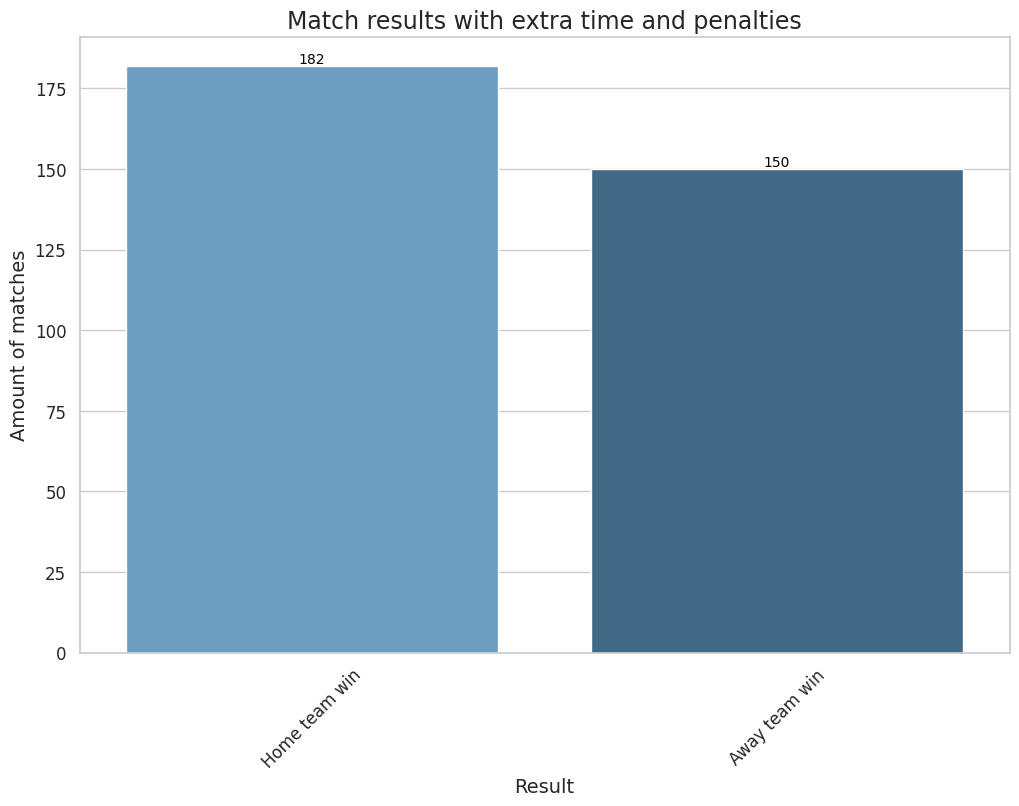

In [ ]:
# Bar chart for results with extra time and penalties
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=extra_time_and_penalties, x='home_team_result', palette="Blues_d")
plt.title('Match results with extra time and penalties', fontsize=17)
plt.xlabel('Result', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Amount of matches', fontsize=14)
plt.yticks(fontsize=12)

# To change the labels of the bars
ax.set_xticklabels(['Home team win', 'Away team win'])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

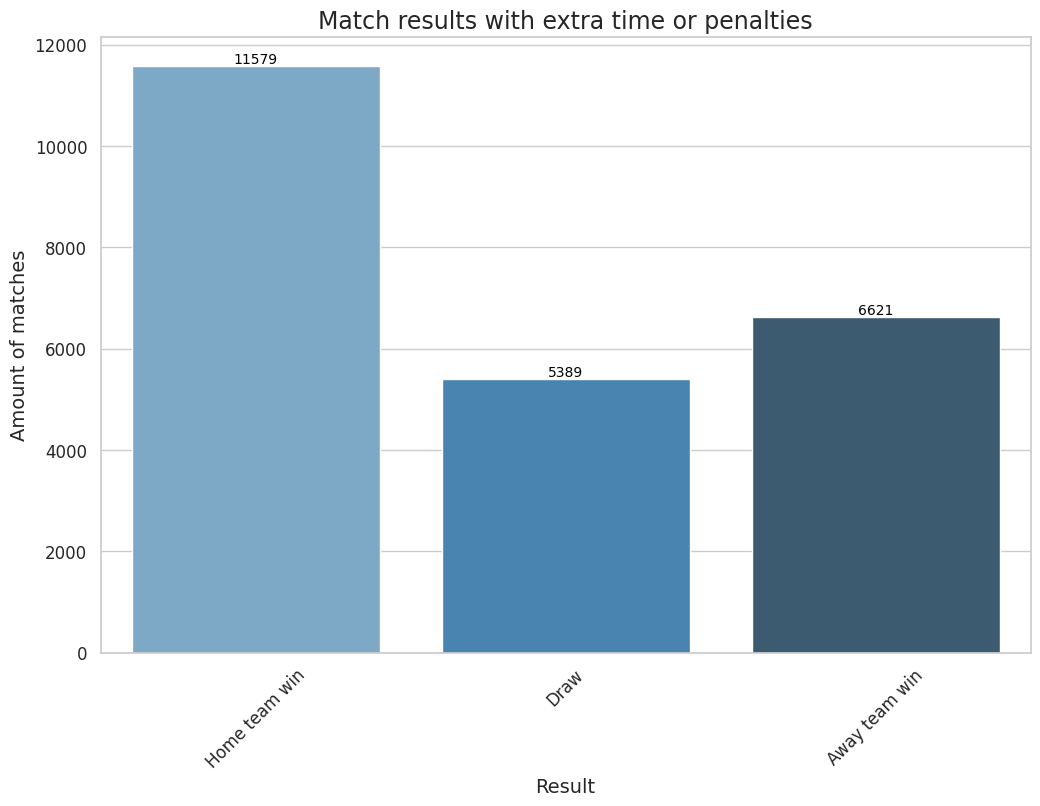

In [ ]:
# Bar chart for results without extra time or penalties
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=no_extra_time_or_penalties, x='home_team_result', palette="Blues_d")
plt.title('Match results with extra time or penalties', fontsize=17)
plt.xlabel('Result', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Amount of matches', fontsize=14)
plt.yticks(fontsize=12)

# To change the labels of the bars
ax.set_xticklabels(['Home team win', 'Draw', 'Away team win'])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Visually, it can also be observed that a visiting team has a better chance of winning by reaching the penalty shootout.

## 7. Machine Learning Models training and optimization: Feature Engineering

### 7.1. Target definition

There are several alternatives available to define the target variable, such as:
1. Determining the best team in history.
2. Predicting the winner of an upcoming tournament (e.g., the World Cup).
3. Predicting the winner of a specific match.
4. Predicting whether a home team will win their match or not.
<br><br>

Let's focus on the case of determining whether the home team achieves a victory. In other words, let's build machine learning models that allow us to predict, based on our dataset, whether a home team will win its match or not. This falls under a **classification problem**.



The first step is to **revisit the original dataset**. This is to perform all the necessary preprocessing (handling missing values, normalization, PCA, encoding, etc.) only on the training data.

In [ ]:
# Redefine a new dataset, starting from the original CSV file
df_soccer_home_team_result = pd.read_csv("international_matches.csv", delimiter=',')
df_soccer_home_team_result.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's work with the home_team_result column to predict the results of a home team. In this case, let's make the target variable to be binary, so let's consider positive outcomes when the home team achieves a victory, while in any other case (loss or draw), the value will be zero. An encoding dictionary can be used here.

In [ ]:
dic_cod = {"Win": 1, "Draw": 0, "Lose": 0}
df_soccer_home_team_result["label"] = df_soccer_home_team_result["home_team_result"].map(dic_cod)

In [ ]:
# Remove the target column and the ones I want to exclude from the process
columns_to_drop = ["home_team_result", "home_team_score", "away_team_score"]
df_soccer_home_team_result.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_soccer_home_team_result.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,city,country,neutral_location,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,label
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,La Paz,Bolivia,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,Maceió,Brazil,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,Quito,Ecuador,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,Conakry,Guinea,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,Asunción,Paraguay,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 7.2. Definition of "X," "y," "training," "validation," and "test"

Let's define X and y, and then split the data into training and testing:

In [ ]:
# Define X and y
X = df_soccer_home_team_result.drop(['label'], axis=1)
X.columns = X.columns.astype(str) # Convert all variables to string type names
y = df_soccer_home_team_result['label'] # --> The target variable

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1214)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify = y_trainval, random_state=1214)

Let's check how each set of X looks like, corresponding to:
- Training and Validation
- Training
- Validation
- Test

In [ ]:
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(19136, 22) (14352, 22) (4784, 22) (4785, 22)


This indicates the shape of each set, with X_trainval being the largest and the one to use to process the data before replicating it in the other sets.

### 7.3. Reducing the dimensionality of the dataset

Let's use a combination of methods to apply feature selection and thereby reduce the dimensionality of the dataset.
<br><br>
Specifically, after handling missing values, let's select the numerical variables from the dataset to apply the PCA method after standardizing the relevant numerical ones.
<br><br>
On the other hand, let's keep some categorical independent variables, such as the name of the home team and the name of the away team, to assist us in our prediction.

#### 7.3.1. Handling missing values

Let's fill the null values in X_trainval with the mean in each corresponding column, while in the rest of the sets, let's fill them with the mean obtained from X_trainval.

In [ ]:
# Handling missing values in X_trainval
for i in range(X_trainval.shape[1]):
  if X_trainval.iloc[i:,i].isnull().sum() > 0:
    X_trainval.iloc[:,i] = X_trainval.iloc[:,i].replace(np.nan, X_trainval.iloc[:,i].mean())

In [ ]:
# Using the mean of each column in X_trainval to fill the null values in the other sets of X
X_trainval.mean(numeric_only=True)

home_team_fifa_rank               77.705581
away_team_fifa_rank               80.873014
home_team_total_fifa_points      322.475125
away_team_total_fifa_points      314.331208
neutral_location                   0.251620
home_team_goalkeeper_score        74.924177
away_team_goalkeeper_score        74.174907
home_team_mean_defense_score      74.876291
home_team_mean_offense_score      75.794848
home_team_mean_midfield_score     75.871470
away_team_mean_defense_score      74.390960
away_team_mean_offense_score      75.387268
away_team_mean_midfield_score     75.205984
dtype: float64

In [ ]:
# Handling missing values in X_train, X_val y X_test,
# by filling null values with the mean of each corresponding column in X_trainval
def fillna_with_trainval_mean(df, reference_df):
    return df.fillna(reference_df.mean(numeric_only=True))

X_train = fillna_with_trainval_mean(X_train, X_trainval)
X_val = fillna_with_trainval_mean(X_val, X_trainval)
X_test = fillna_with_trainval_mean(X_test, X_trainval)

Check that there are no more null values in any of the X sets:

In [ ]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isnull().sum().sum()
    print(total_null_values)

0
0
0
0


#### 7.3.2. Selection of variables of interest

For each set, generate an auxiliary dataset with the relevant numerical features. It's important to note that 'home_team_score' and 'away_team_score' columns are excluded, as they contain the goals for each team, and including them could impact the models as they contain future information at the time of prediction.

Additionally, select some categorical variables that will aid the model. Let's keep the name of each team (home and away) to leave the target variable for predicting the winner.

In [ ]:
# List of relevant numerical columns
numerical_columns = [
    'home_team_fifa_rank', 'away_team_fifa_rank',
    'home_team_total_fifa_points', 'away_team_total_fifa_points',
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score',
    'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score',
    'away_team_mean_offense_score', 'away_team_mean_midfield_score'
]

# Selecting numerical columns
X_trainval_numerical_data = X_trainval[numerical_columns]
X_train_numerical_data = X_train[numerical_columns]
X_val_numerical_data = X_val[numerical_columns]
X_test_numerical_data = X_test[numerical_columns]

# List of relevant categorical columns
categorical_columns = ['home_team', 'away_team']

# Selecting categorical columns
X_trainval_categorical_data = X_trainval[categorical_columns]
X_train_categorical_data = X_train[categorical_columns]
X_val_categorical_data = X_val[categorical_columns]
X_test_categorical_data = X_test[categorical_columns]

#### 7.3.3. Numerical variables standardization

Let's normalize the numerical variables according to the minimum and maximum values of each variable, with a function to perform this action.

In [ ]:
# Function to normalize the numerical variables according to the minimum and maximum values of each variable
def normalize(df):
    result = df.copy()

    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result

Let's normalize each of the 4 sets:

In [ ]:
X_trainval_numerical_data_norm = normalize(X_trainval_numerical_data[numerical_columns])
X_train_numerical_data_norm = normalize(X_train_numerical_data[numerical_columns])
X_val_numerical_data_norm = normalize(X_val_numerical_data[numerical_columns])
X_test_numerical_data_norm = normalize(X_test_numerical_data[numerical_columns])

#### 7.3.4. PCA (Principal Component Analysis)

With the numerical variables already normalized, let's apply the PCA method to reduce the dimensionality of our dataset by projecting onto a subspace of lower dimensionality, and preserving as much of the variance of the original data as possible.

In [ ]:
# PCA in X_trainval
pca_trainval = PCA()
X_trainval_numerical_data_norm_pca = pd.DataFrame(pca_trainval.fit_transform(X_trainval_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_trainval.explained_variance_ratio_

array([0.38221185, 0.28820592, 0.12090514, 0.07719953, 0.05511455,
       0.01730046, 0.01610352, 0.00997874, 0.00978478, 0.00796559,
       0.007682  , 0.00754792])

This tells us that the 1st column explains 38% of the original dataset, the 2nd column explains 29% of the original dataset, and so on.
 <br><br>
Let's keep the first 4 columns that explain around **86% of our original dataset**.

In [ ]:
X_trainval_numerical_data_norm_pca_86 = X_trainval_numerical_data_norm_pca.iloc[:, :4]

Doing the same in the rest of X sets:

In [ ]:
# PCA in X_train
pca_train = PCA()
X_train_numerical_data_norm_pca = pd.DataFrame(pca_train.fit_transform(X_train_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_train.explained_variance_ratio_

array([0.37734213, 0.28961227, 0.12281058, 0.07798979, 0.05552885,
       0.01748393, 0.01617213, 0.0100954 , 0.0099047 , 0.00802945,
       0.00766569, 0.00736507])

Similar to X_trainval, it tells us that the 1st column explains almost 38% of the original dataset, that the 2nd column explains almost 29% of the original dataset, and so on.
 <br><br>
Let's stay with the first 4 columns that manage to explain about **86% of our original dataset.**

In [ ]:
X_train_numerical_data_norm_pca_86 = X_train_numerical_data_norm_pca.iloc[:, :4]

Now, in X_val:

In [ ]:
# PCA in X_val
pca_val = PCA()
X_val_numerical_data_norm_pca = pd.DataFrame(pca_val.fit_transform(X_val_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_val.explained_variance_ratio_

array([0.39397792, 0.28081829, 0.11425587, 0.07837891, 0.0551388 ,
       0.01726598, 0.01569809, 0.01070923, 0.01024175, 0.00861954,
       0.0075203 , 0.00737531])

In this case, the 1st column explains almost 39% of the original dataset, the 2nd column explains 28% of the original dataset, and so on.
 <br><br>
 Let's stay with the first 4 columns that manage to explain almost **87% of our original dataset.**

In [ ]:
X_val_numerical_data_norm_pca_87 = X_val_numerical_data_norm_pca.iloc[:, :4]

Finally, in X_test:

In [ ]:
# PCA in X_test
pca_test = PCA()
X_test_numerical_data_norm_pca = pd.DataFrame(pca_test.fit_transform(X_test_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_test.explained_variance_ratio_

array([0.38571983, 0.28411563, 0.12002364, 0.07805496, 0.05582965,
       0.01722573, 0.01569686, 0.0104663 , 0.01000124, 0.00792052,
       0.00761486, 0.00733077])

This tells us that the 1st column explains 38% of the original dataset, the 2nd column explains 28% of the original dataset, and so on.

We are going to stay with the first 4 columns that manage to explain **87% of our original dataset**.

In [ ]:
X_test_numerical_data_norm_pca_87 = X_test_numerical_data_norm_pca.iloc[:, :4]

#### 7.3.5. Using One-Hot Encoding

Let's use the One-Hot Encoding method to represent the selected categorical variables as numeric variables.

In [ ]:
def encode_categorical_data(data, encoder):
    enc_teams = encoder.transform(data)
    return pd.DataFrame(data=enc_teams, columns=encoder.get_feature_names_out())

ohe = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding (with fit_transform) to categorical variables in X_trainval
enc_teams_trainval = ohe.fit_transform(X_trainval_categorical_data[categorical_columns])
X_trainval_categorical_data_encoded = pd.DataFrame(data=enc_teams_trainval, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_train
enc_teams_train = ohe.transform(X_train_categorical_data[categorical_columns])
X_train_categorical_data_encoded = pd.DataFrame(data=enc_teams_train, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_val
enc_teams_val = ohe.transform(X_val_categorical_data[categorical_columns])
X_val_categorical_data_encoded = pd.DataFrame(data=enc_teams_val, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_test
enc_teams_test = ohe.transform(X_test_categorical_data[categorical_columns])
X_test_categorical_data_encoded = pd.DataFrame(data=enc_teams_test, columns=ohe.get_feature_names_out())

X_trainval_categorical_data_encoded.shape, X_train_categorical_data_encoded.shape, X_val_categorical_data_encoded.shape, X_test_categorical_data_encoded.shape

((19136, 422), (14352, 422), (4784, 422), (4785, 422))

#### 7.3.6. Joining the datasets

Finally, let's join the dataset of numerical variables with the categorical ones in each of the sets to be able to apply them to the models, but before that let's reset the indexes:

In [ ]:
# Prepare the datasets to reset their indexes
dataframes_to_reset = [X_trainval, X_train, X_val, X_test]
numerical_data_to_reset = [X_trainval_numerical_data_norm, X_train_numerical_data_norm, X_val_numerical_data_norm, X_test_numerical_data_norm]
categorical_data_to_reset = [X_trainval_categorical_data_encoded, X_train_categorical_data_encoded, X_val_categorical_data_encoded, X_test_categorical_data_encoded]
numerical_data_pca_to_reset = [X_trainval_numerical_data_norm_pca_86, X_train_numerical_data_norm_pca_86, X_val_numerical_data_norm_pca_87, X_test_numerical_data_norm_pca_87]
y_to_reset = [y_trainval, y_train, y_val, y_test]

# Reset the indexes using a FOR loop
for dataset in dataframes_to_reset:
    dataset.reset_index(drop=True, inplace=True)

for numerical_data in numerical_data_to_reset:
    numerical_data.reset_index(drop=True, inplace=True)

for categorical_data in categorical_data_to_reset:
    categorical_data.reset_index(drop=True, inplace=True)

for numerical_data_pca in numerical_data_pca_to_reset:
    numerical_data_pca.reset_index(drop=True, inplace=True)

for target in y_to_reset:
    target.reset_index(drop=True, inplace=True)


In [ ]:
# Concatenate the dataframes along columns

# Redefine X_trainval with numerical columns with PCA and encoded categorical columns
X_trainval = pd.concat([X_trainval_numerical_data_norm_pca_86, X_trainval_categorical_data_encoded], axis=1)

# Redefine X_train with numerical columns with PCA and encoded categorical columns
X_train = pd.concat([X_train_numerical_data_norm_pca_86, X_train_categorical_data_encoded], axis=1)

# Redefine X_val with numerical columns with PCA and encoded categorical columns
X_val = pd.concat([X_val_numerical_data_norm_pca_87, X_val_categorical_data_encoded], axis=1)

# Redefine X_test with numerical columns with PCA and encoded categorical columns
X_test = pd.concat([X_test_numerical_data_norm_pca_87, X_test_categorical_data_encoded], axis=1)

Rechecking not to count with nulls:

In [ ]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isna().sum().sum()
    print(total_null_values)

0
0
0
0


In [ ]:
# Check the shape of the X datasets after merging numerical and categorical sets
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(19136, 426) (14352, 426) (4784, 426) (4785, 426)


## Machine learning models

### 8.1. Model selection and evaluation

Let's evaluate different classification algorithms, training each one and validating them. The different models will be compared with the F1-score metric, to then stay with the best of them and be able to predict on the Test set.

First let's identify the total number of classes, that is, the number of possible values of the target 'y':

In [ ]:
# Get the number of classes
print("Total number of classes:", y.nunique())
print("Count per class:\n", y.value_counts())

Total number of classes: 2
Count per class:
 0    12160
1    11761
Name: label, dtype: int64


That is to say that it is a binary classification problem (2 possible classes), and that the classes are also relatively balanced. Let's look at these model options:
*   Decision trees can represent a simple option for these types of problems.
*   Random Forest represents an extension of decision trees, which help reduce overfitting and are typically more robust than decision trees.
*   A logistic regression solution could also work well on these types of problems.
*   The K-Nearest Neighbors (KNN) model can be a valid choice for this problem, but the performance can be affected by the size of the data set and the appropriate choice of the value of K.
*   Another valid option is a Support Vector Machine (SVM) model which is a type of supervised learning algorithm that is commonly used for classification problems like these.
*   Finally, let's consider using XGBoost as the latest model. XGBoost is an efficient implementation of the gradient boosting algorithm and has proven to be successful in classification problems, especially when dealing with balanced data sets. It can handle large data sets and tends to provide good results in terms of accuracy and generalization.

Let's look at the values that each one returns, separately. We could use the accuracy metric for having balanced classes, or F1-score. We stick with F1-score to compare between models, as it provides us with a balanced measure between precision and completeness.

In [ ]:
# Convert all variables to string type names
X_trainval.columns = X_trainval.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# List of models to compare and their parameters
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Logistic Regression", LogisticRegression(solver='liblinear')),
    ("KNN = 4", KNeighborsClassifier(n_neighbors=4)),
    ("KNN = 5", KNeighborsClassifier(n_neighbors=5)),
    ("SVM Lineal", SVC(C = 1.0, kernel='linear')),
    ("XGBoost", XGBClassifier(n_estimators=200, max_depth = 3, learning_rate = 0.01))
]

In [ ]:
df_f1_metrics = pd.DataFrame() # DataFrame to compare F1-score values for each model

for model_name, model in models:
    start_time = time.time()  # Record the start time

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time

    df_f1_results = pd.DataFrame({"Model": [model_name], "F1 on Training": [train_f1], "F1 on Validation": [val_f1], "Elapsed time": [elapsed_time]})
    df_f1_metrics = pd.concat([df_f1_metrics, df_f1_results], axis=0).reset_index(drop=True)


### 8.2. Model comparison

In order to compare the models, let's look at the F1-Score values in each of them, along with the difference between Training and Validation.

In [ ]:
df_f1_metrics["Difference between Training and Validation"] = df_f1_metrics["F1 on Training"] - df_f1_metrics["F1 on Validation"]
# Reorder the columns
df_f1_metrics[["Model", "F1 on Training", "F1 on Validation", "Difference between Training and Validation", "Elapsed time"]]

,Model,F1 on Training,F1 on Validation,Difference between Training and Validation,Elapsed time
0,Decision Tree,0.995051,0.398834,0.596216,0.802387
1,Random Forest,0.995051,0.388901,0.606150,8.320033
2,Logistic Regression,0.707346,0.541401,0.165946,0.084311
3,KNN = 4,0.763606,0.562414,0.201192,7.385349
4,KNN = 5,0.771950,0.589271,0.182679,6.771983
5,SVM Lineal,0.709571,0.630075,0.079496,85.637481
6,XGBoost,0.677527,0.320120,0.357407,2.154239


In the table we can see the F1-Score values in the training and validation sets. Furthermore, we can see the differences between them. All this for each of the models evaluated. And in this table we observe that the best values of the F1-Score metric in validation were obtained in the **Linear SVM** model.

Additionally, it is very important to take into account the differences between the metrics in the training and validation sets, since a model that has high performance in the training set but significantly lower performance in validation could be overfitting the training data, as occurs for example in the "Decision Tree" and "Random Forest" models that show a large difference between the F1-score in training and validation, which suggests that both have some type of overfitting. On the other hand, the smallest difference between both sets is found in **Linear SVM**, so this model has a slight advantage to be chosen.

However, comparing the processing times, clearly **SVM Linear** is not a convenient model, since its metrics are not proportionally better with respect to the rest of the models taking into account the delay in processing. In this aspect, the best is **Logistic Regression**.

But let's also look at each of the models through cross-validation to make a more precise decision:

In [ ]:
n_folds = 5  # Number of folds
results = [] # To store the results

# Perform cross-validation for each model with a FOR loop
for model_name, model in models:
    start_time = time.time()  # Record start time

    scores = cross_val_score(model, X_trainval, y_trainval, cv=n_folds, scoring='f1')
    avg_f1 = scores.mean() # Average F1 score
    std_f1 = scores.std()  # F1 score standard deviation

    end_time = time.time()  # Record end time
    elapsed_time = end_time - start_time  # Calculate elapsed time

    print(f"{model_name} Results:")
    print(f"F1 scores in each fold: {scores}")
    print(f"Average F1-score: {avg_f1}")
    print(f"Standard Deviation of F1-score: {std_f1}")
    print(f"Elapsed Time: {elapsed_time} seconds\n")

    results.append({'Model': model_name, 'Average F1': avg_f1, 'Standard Deviation F1': std_f1, 'Elapsed time': elapsed_time})

# Create a DataFrame with the results
df_cross_validation = pd.DataFrame(results)
df_cross_validation

Decision Tree Results:
F1 scores in each fold: [0.60704752 0.6031408  0.60096411 0.59296482 0.59112774]
Average F1-score: 0.5990489996066705
Standard Deviation of F1-score: 0.006068778583979713
Elapsed Time: 4.006845951080322 seconds

Random Forest Results:
F1 scores in each fold: [0.66346154 0.65384615 0.65794494 0.65442765 0.65556153]
Average F1-score: 0.6570483616567502
Standard Deviation of F1-score: 0.003500447499040535
Elapsed Time: 43.956079959869385 seconds

Logistic Regression Results:
F1 scores in each fold: [0.69094748 0.66897839 0.69321219 0.68125338 0.68488746]
Average F1-score: 0.6838557792283199
Standard Deviation of F1-score: 0.008567473485807383
Elapsed Time: 0.5320632457733154 seconds

KNN = 4 Results:
F1 scores in each fold: [0.58581517 0.56861538 0.57781863 0.5904059  0.56589862]
Average F1-score: 0.5777107401937653
Standard Deviation of F1-score: 0.009477471179817759
Elapsed Time: 7.618840217590332 seconds

KNN = 5 Results:
F1 scores in each fold: [0.65638298 0.639

,Model,Average F1,Standard Deviation F1,Elapsed time
0,Decision Tree,0.599049,0.006069,4.006846
1,Random Forest,0.657048,0.003500,43.956080
2,Logistic Regression,0.683856,0.008567,0.532063
3,KNN = 4,0.577711,0.009477,7.618840
4,KNN = 5,0.647352,0.009164,7.534712
5,SVM Lineal,0.680551,0.008035,296.945265
6,XGBoost,0.667025,0.004874,12.257122


The cross validation based on the F1-Score values indicates that the highest averages are found in **Logistic Regression**, in **Linear SVM** and in **XGBoost**, which suggests that here we have slightly better performance compared to the other models, in terms of precision and completeness.

It should also be noticed the processing time numbers, where **Linear SVM** is computationally much more expensive, having a significantly higher processing time than the rest. In this aspect, **Logistic Regression** has a very low time, followed by **Decision Tree**.

As a conclusion, we could choose **Linear Regression** or **Linear SVM**, since both work very well. But based on the results obtained and considering the mentioned factors (such as processing time), **the Logistic Regression model represents the best option**, since it has a reasonable F1-score in the training and validation sets, thus it does not show a significant overfitting. Lets evaluate in X_test with that model.

### 8.3. Evaluating X_Test with Logistic Regression

Now that we have chosen a model, let's see its behavior with unknown data, that is, in X_Test and compare it with its other predictions, with several more metrics.

In [ ]:
# Create the Logistic Regression model
model = LogisticRegression(solver='liblinear')
# Train the model with training data
model.fit(X_train, y_train)
# Predict with training data
y_train_pred = model.predict(X_train)
# Predict with validation data
y_val_pred = model.predict(X_val)
# Train the model with the entire training set (trainval)
model.fit(X_trainval, y_trainval)
# Predict with test data
y_test_pred = model.predict(X_test)

# Metrics:
# accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on training:", train_accuracy)
print("Accuracy on validation:", val_accuracy)
print("Accuracy on test:", test_accuracy)

# precision
train_precision = precision_score(y_train, y_train_pred, average='macro', zero_division=1)
val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Precision on training:", train_precision)
print("Precision on validation:", val_precision)
print("Precision on test:", test_precision)

# Recall
train_recall = recall_score(y_train, y_train_pred, average='macro', zero_division=1)
val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=1)
test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Recall on training:", train_recall)
print("Recall on validation:", val_recall)
print("Recall on test:", test_recall)

# F1-score
train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=1)
print("F1-Score on training:", train_f1)
print("F1-Score on validation:", val_f1)
print("F1-Score on test:", test_f1)

# Classification report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
print("\nClassification report on training:\n", train_report)
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("\nClassification report on validation:\n", val_report)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
print("\nClassification report on test:\n", test_report)

# confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix on training:\n")
print(train_cm)
val_cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix on validation:\n")
print(val_cm)
test_cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on test:\n")
print(test_cm)

Accuracy on training: 0.7074972129319955
Accuracy on validation: 0.5434782608695652
Accuracy on test: 0.7001044932079414
Precision on training: 0.7074281269690477
Precision on validation: 0.5430914511160658
Precision on test: 0.7000345433463959
Recall on training: 0.7073151629072681
Recall on validation: 0.5425044195309703
Recall on test: 0.7000606903001767
F1-Score on training: 0.7073462172629512
F1-Score on validation: 0.5414006565956364
F1-Score on test: 0.7000439156702059

Classification report on training:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      7296
           1       0.71      0.70      0.70      7056

    accuracy                           0.71     14352
   macro avg       0.71      0.71      0.71     14352
weighted avg       0.71      0.71      0.71     14352


Classification report on validation:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57      2432
       

Let's graphically compare the predictions with the actual values for each 'y' set.

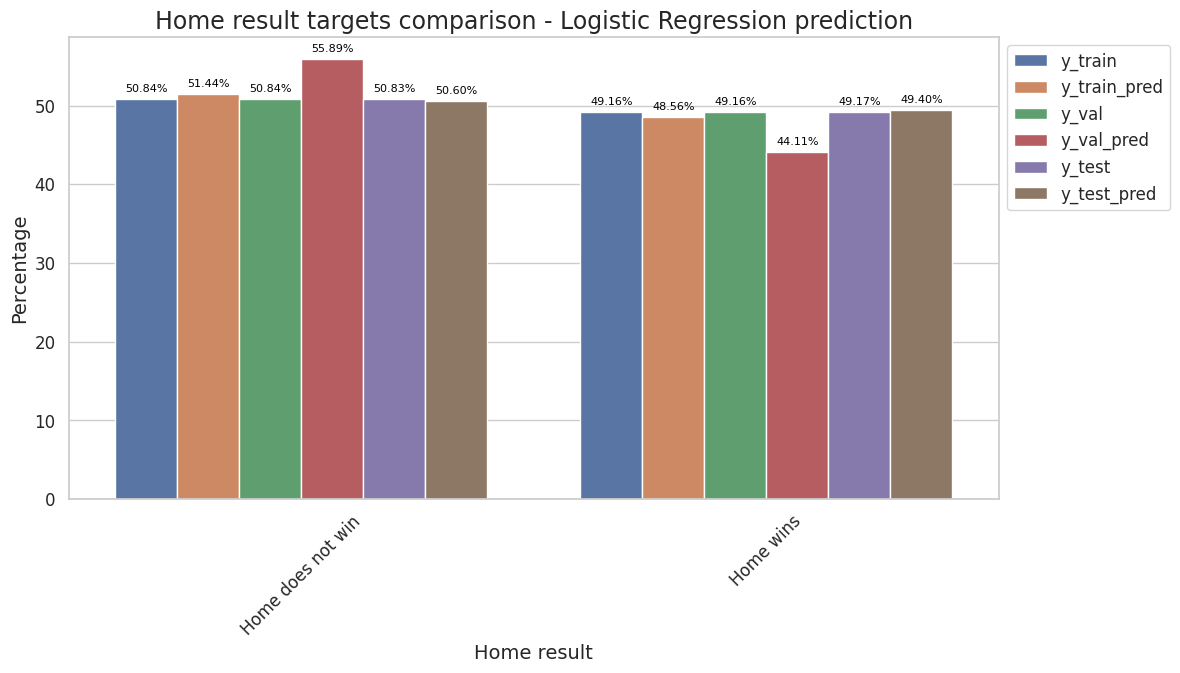

In [ ]:
# To visualize the percentages of 'y' values in a plot
# Calculate unique values and counts for train, val, and test (actual and predicted)
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
unique_values_train_pred, counts_train_pred = np.unique(y_train_pred, return_counts=True)
unique_values_val, counts_val = np.unique(y_val, return_counts=True)
unique_values_val_pred, counts_val_pred = np.unique(y_val_pred, return_counts=True)
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
unique_values_test_pred, counts_test_pred = np.unique(y_test_pred, return_counts=True)

# Create a dataframe for each
data_y_train = {'Values': unique_values_train, 'Percentage': (counts_train/sum(counts_train)*100), 'Label': 'y_train'}
data_y_train_pred = {'Values': unique_values_train_pred, 'Percentage': (counts_train_pred/sum(counts_train_pred)*100), 'Label': 'y_train_pred'}
data_y_val = {'Values': unique_values_val, 'Percentage': (counts_val/sum(counts_val)*100), 'Label': 'y_val'}
data_y_val_pred = {'Values': unique_values_val_pred, 'Percentage': (counts_val_pred/sum(counts_val_pred)*100), 'Label': 'y_val_pred'}
data_y_test = {'Values': unique_values_test, 'Percentage': (counts_test/sum(counts_test)*100), 'Label': 'y_test'}
data_y_test_pred = {'Values': unique_values_test_pred, 'Percentage': (counts_test_pred/sum(counts_test_pred)*100), 'Label': 'y_test_pred'}

# Create dataframes
df_train = pd.DataFrame(data_y_train)
df_train_pred = pd.DataFrame(data_y_train_pred)
df_val = pd.DataFrame(data_y_val)
df_val_pred = pd.DataFrame(data_y_val_pred)
df_test_pred = pd.DataFrame(data_y_test_pred)
df_test = pd.DataFrame(data_y_test)

# Combine the dataframes into one
combined_df = pd.concat([df_train, df_train_pred, df_val, df_val_pred, df_test, df_test_pred], ignore_index=True)

# Map label values before plotting
combined_df['Home result'] = combined_df['Values'].map({0: 'Home does not win', 1: 'Home wins'})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Home result', y='Percentage', hue='Label', data=combined_df)
# Add values on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Home result', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Home result targets comparison - Logistic Regression prediction', fontsize=17)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

## 9. Adding new variables to reevaluate models

The idea in this section is to re-evaluate the models, but making a selection of different variables (existing or new calculated), both numerical and categorical, in order to evaluate if the models improve their metrics, also reducing overfitting.

Let's start from the original dataset:

In [ ]:
# Define a new dataset, starting from the original dataset
df_soccer_home_team_result_new_features = pd.read_csv("international_matches.csv", delimiter=',')

Encoding the **home_team_result** column to make it our target.

In [ ]:
dic_cod = {"Win": 1, "Draw": 0, "Lose": 0}
df_soccer_home_team_result_new_features["label"] = df_soccer_home_team_result_new_features["home_team_result"].map(dic_cod)

In [ ]:
# Delete the target column and the ones I want to eliminate from the process
df_soccer_home_team_result_new_features.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_soccer_home_team_result_new_features.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,city,country,neutral_location,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,label
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,La Paz,Bolivia,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,Maceió,Brazil,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,Quito,Ecuador,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,Conakry,Guinea,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,Asunción,Paraguay,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Let's define X and y, and then split the data into training and testing:

In [ ]:
# Define X and y
X = df_soccer_home_team_result_new_features.drop(['label'], axis=1)
X.columns = X.columns.astype(str) # Convert all variables to string type names
y = df_soccer_home_team_result_new_features['label'] # --> The target variable

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1214)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify = y_trainval, random_state=1214)

Let's check how each set of X turned out, corresponding to:
- Training and Validation
- Training
- Validation
- Test

In [ ]:
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(19136, 22) (14352, 22) (4784, 22) (4785, 22)


To deal with missing values, let's fill the null values in X_trainval with the average in each corresponding column, while in the rest let's fill them with the average obtained from X_trainval.

In [ ]:
# Handling missing values in X_trainval
for i in range(X_trainval.shape[1]):
  if X_trainval.iloc[i:,i].isnull().sum() > 0:
    X_trainval.iloc[:,i] = X_trainval.iloc[:,i].replace(np.nan, X_trainval.iloc[:,i].mean())

In [ ]:
# Using the mean of each column in X_trainval to fill the null values in the other sets of X
X_trainval.mean(numeric_only=True)

home_team_fifa_rank               77.705581
away_team_fifa_rank               80.873014
home_team_total_fifa_points      322.475125
away_team_total_fifa_points      314.331208
neutral_location                   0.251620
home_team_goalkeeper_score        74.924177
away_team_goalkeeper_score        74.174907
home_team_mean_defense_score      74.876291
home_team_mean_offense_score      75.794848
home_team_mean_midfield_score     75.871470
away_team_mean_defense_score      74.390960
away_team_mean_offense_score      75.387268
away_team_mean_midfield_score     75.205984
dtype: float64

In [ ]:
# Handling missing values in X_train, X_val y X_test,
# by filling null values with the mean of each corresponding column in X_trainval

def fillna_with_trainval_mean(df, reference_df):
    return df.fillna(reference_df.mean(numeric_only=True))

X_train = fillna_with_trainval_mean(X_train, X_trainval)
X_val = fillna_with_trainval_mean(X_val, X_trainval)
X_test = fillna_with_trainval_mean(X_test, X_trainval)

Check that there are no more null values in any of the X sets:

In [ ]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isnull().sum().sum()
    print(total_null_values)

0
0
0
0


### 9.1. Calculation of new synthetic variables

Let's add new calculated variables to the dataset, in order to try to improve the performance of the machine learning models previously evaluated.

Let's calculate:

* The difference in the FIFA Ranking between home and away.
* The difference in Total FIFA Points between home and away.
* Home team score (averaging the scores of the positions on the playing field).
* Visiting team score (averaging the scores of the positions on the playing field).

In [ ]:
# List of column names
score_columns = ['goalkeeper_score', 'mean_defense_score', 'mean_offense_score', 'mean_midfield_score']

# Difference in FIFA ranking between home and away teams
X_columns = ['home_team_fifa_rank', 'away_team_fifa_rank']
X_datasets = [X_trainval, X_train, X_val, X_test]
for X in X_datasets:
    X['diff_ranking_fifa'] = X['home_team_fifa_rank'] - X['away_team_fifa_rank']

# Difference in total FIFA points between home and away teams
X_columns = ['home_team_total_fifa_points', 'away_team_total_fifa_points']
X_datasets = [X_trainval, X_train, X_val, X_test]
for X in X_datasets:
    X['diff_total_fifa_points'] = X['home_team_total_fifa_points'] - X['away_team_total_fifa_points']

# Average scores
teams = ['home', 'away']
datasets = [X_trainval, X_train, X_val, X_test]
for team in teams:
    for dataset in datasets:
        dataset[f'{team}_team_avg_score'] = dataset[[f'{team}_team_{col}' for col in score_columns]].mean(axis=1)

### 9.2. Reselecting variables of interest

Now, select **different variables of interest** to reevaluate the models.

* Regarding numerical columns, let's add the recently calculated ones.
* For categorical columns, let's add the Tournament name data (tournament) to verify if this helps improve the predictions.

In [ ]:
# List of numeric columns
numerical_columns = [
    'home_team_fifa_rank', 'away_team_fifa_rank',
    'home_team_total_fifa_points', 'away_team_total_fifa_points',
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
    'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
    'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score',
    'diff_ranking_fifa', 'diff_total_fifa_points',
    'home_team_avg_score', 'away_team_avg_score'
]

# Numeric column selection
X_trainval_numerical_data = X_trainval[numerical_columns]
X_train_numerical_data = X_train[numerical_columns]
X_val_numerical_data = X_val[numerical_columns]
X_test_numerical_data = X_test[numerical_columns]

# List of categorical columns
categorical_columns = ['home_team', 'away_team', 'tournament']

# Categorical column selection
X_trainval_categorical_data = X_trainval[categorical_columns]
X_train_categorical_data = X_train[categorical_columns]
X_val_categorical_data = X_val[categorical_columns]
X_test_categorical_data = X_test[categorical_columns]

### 9.3. Numerical variables standardization

Again, let's normalize the numerical variables according to the minimum and maximum values of each variable, with a function to perform this action.

In [ ]:
X_trainval_numerical_data_norm = normalize(X_trainval_numerical_data[numerical_columns])
X_train_numerical_data_norm = normalize(X_train_numerical_data[numerical_columns])
X_val_numerical_data_norm = normalize(X_val_numerical_data[numerical_columns])
X_test_numerical_data_norm = normalize(X_test_numerical_data[numerical_columns])

### 9.4. PCA (Principal Component Analysis)

With the new numerical variables already normalized, let's apply the PCA method to reduce the dimensionality of our dataset, as it was done with the previous selection of numerical variables.

In [ ]:
# PCA in X_trainval
pca_trainval = PCA()
X_trainval_numerical_data_norm_pca = pd.DataFrame(pca_trainval.fit_transform(X_trainval_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_trainval.explained_variance_ratio_

array([3.43972192e-01, 2.56662688e-01, 1.62155944e-01, 9.38860871e-02,
       6.93291198e-02, 1.53649614e-02, 1.43840237e-02, 1.32151454e-02,
       8.81044493e-03, 8.63053559e-03, 6.91483737e-03, 6.67402066e-03,
       4.67780461e-32, 2.93335807e-32, 1.31319582e-32, 7.23609339e-33])

This tells us that the 1st column explains 34% of the original dataset, the 2nd column explains 26% of the original dataset, and so on.
<br><br>
Let's keep the first 4 columns that explain around **87% of our original dataset**.

In [ ]:
X_trainval_numerical_data_norm_pca_87 = X_trainval_numerical_data_norm_pca.iloc[:, :4]

Doing the same in the rest of X sets:

In [ ]:
# PCA in X_train
pca_train = PCA()
X_train_numerical_data_norm_pca = pd.DataFrame(pca_train.fit_transform(X_train_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_train.explained_variance_ratio_

array([3.38413606e-01, 2.57085454e-01, 1.66287502e-01, 9.43438418e-02,
       6.96515224e-02, 1.55351027e-02, 1.43818448e-02, 1.33588404e-02,
       8.86769146e-03, 8.72876468e-03, 6.85174669e-03, 6.49408339e-03,
       8.73246699e-32, 2.57679072e-32, 8.55276936e-33, 3.10705065e-33])

Similar to X_trainval, it tells us that the 1st column explains almost 34% of the original dataset, that the 2nd column explains almost 26% of the original dataset, and so on.
<br><br>
Let's stay with the first 4 columns that manage to explain about **88% of our original dataset.**

In [ ]:
X_train_numerical_data_norm_pca_88 = X_train_numerical_data_norm_pca.iloc[:, :4]

Now, in X_val:

In [ ]:
# PCA in X_val
pca_val = PCA()
X_val_numerical_data_norm_pca = pd.DataFrame(pca_val.fit_transform(X_val_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_val.explained_variance_ratio_

array([3.54034784e-01, 2.49759207e-01, 1.56176697e-01, 9.43457002e-02,
       6.90733560e-02, 1.54534135e-02, 1.47827728e-02, 1.38592931e-02,
       9.41759334e-03, 9.00976457e-03, 7.58204934e-03, 6.50536904e-03,
       4.20032751e-32, 2.47555249e-32, 5.52102237e-33, 2.89671513e-33])

In this case, the 1st column explains almost 35% of the original dataset, the 2nd column explains 25% of the original dataset, and so on.
<br><br>
Let's stay with the first 4 columns that manage to explain  **87% of our original dataset.**

In [ ]:
X_val_numerical_data_norm_pca_87 = X_val_numerical_data_norm_pca.iloc[:, :4]

Finally, let's repeat in X_test:

In [ ]:
# PCA in X_test
pca_test = PCA()
X_test_numerical_data_norm_pca = pd.DataFrame(pca_test.fit_transform(X_test_numerical_data_norm))

Checking the proportion of the variance explained by each principal component:

In [ ]:
pca_test.explained_variance_ratio_

array([3.46822625e-01, 2.53928690e-01, 1.61283709e-01, 9.35923324e-02,
       6.98849949e-02, 1.52801270e-02, 1.42230759e-02, 1.36967966e-02,
       9.23807225e-03, 8.81318561e-03, 6.74741167e-03, 6.48897997e-03,
       8.43809053e-32, 2.13401471e-32, 1.11375773e-32, 3.36622146e-33])

This tells us that the 1st column explains 35% of the original dataset, the 2nd column explains 25% of the original dataset, and so on.

We are going to stay with the first 4 columns that manage to explain **87% of our original dataset**.

In [ ]:
X_test_numerical_data_norm_pca_87 = X_test_numerical_data_norm_pca.iloc[:, :4]

### 9.5. One-Hot Encodingpara variables categóricas

Let's use the One-Hot Encoding method to represent the selected categorical variables as numeric variables.

In [ ]:
def encode_categorical_data(data, encoder):
    enc_teams = encoder.transform(data)
    return pd.DataFrame(data=enc_teams, columns=encoder.get_feature_names_out())

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding (with fit_transform) to categorical variables in X_trainval
enc_teams_trainval = ohe.fit_transform(X_trainval_categorical_data[categorical_columns])
X_trainval_categorical_data_encoded = pd.DataFrame(data=enc_teams_trainval, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_train
enc_teams_train = ohe.transform(X_train_categorical_data[categorical_columns])
X_train_categorical_data_encoded = pd.DataFrame(data=enc_teams_train, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_val
enc_teams_val = ohe.transform(X_val_categorical_data[categorical_columns])
X_val_categorical_data_encoded = pd.DataFrame(data=enc_teams_val, columns=ohe.get_feature_names_out())

# Apply one-hot encoding (transform only) to categorical variables in X_test
enc_teams_test = ohe.transform(X_test_categorical_data[categorical_columns])
X_test_categorical_data_encoded = pd.DataFrame(data=enc_teams_test, columns=ohe.get_feature_names_out())

X_trainval_categorical_data_encoded.shape, X_train_categorical_data_encoded.shape, X_val_categorical_data_encoded.shape, X_test_categorical_data_encoded.shape

((19136, 504), (14352, 504), (4784, 504), (4785, 504))

### 9.6. Joining the datasets

Finally, let's join the dataset of numerical variables with the categorical ones in each of the sets to be able to apply them to the models, but before that let's reset the indexes:

In [ ]:
# Datasets to reset their indexes
dataframes_to_reset = [X_trainval, X_train, X_val, X_test]
numerical_data_to_reset = [X_trainval_numerical_data_norm, X_train_numerical_data_norm, X_val_numerical_data_norm, X_test_numerical_data_norm]
categorical_data_to_reset = [X_trainval_categorical_data_encoded, X_train_categorical_data_encoded, X_val_categorical_data_encoded, X_test_categorical_data_encoded]
numerical_data_pca_to_reset = [X_trainval_numerical_data_norm_pca_87, X_train_numerical_data_norm_pca_88, X_val_numerical_data_norm_pca_87, X_test_numerical_data_norm_pca_87]
y_to_reset = [y_trainval, y_train, y_val, y_test]

# Reset the indexes
for dataset in dataframes_to_reset:
    dataset.reset_index(drop=True, inplace=True)

for numerical_data in numerical_data_to_reset:
    numerical_data.reset_index(drop=True, inplace=True)

for categorical_data in categorical_data_to_reset:
    categorical_data.reset_index(drop=True, inplace=True)

for numerical_data_pca in numerical_data_pca_to_reset:
    numerical_data_pca.reset_index(drop=True, inplace=True)

for target in y_to_reset:
    target.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate the dataframes
X_trainval = pd.concat([X_trainval_numerical_data_norm_pca_87, X_trainval_categorical_data_encoded], axis=1)
X_train = pd.concat([X_train_numerical_data_norm_pca_88, X_train_categorical_data_encoded], axis=1)
X_val = pd.concat([X_val_numerical_data_norm_pca_87, X_val_categorical_data_encoded], axis=1)
X_test = pd.concat([X_test_numerical_data_norm_pca_87, X_test_categorical_data_encoded], axis=1)

Rechecking not to count with nulls:

In [ ]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isnull().sum().sum()
    print(total_null_values)

0
0
0
0


In [ ]:
# Check the shape of the X datasets after merging numerical and categorical sets
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(19136, 508) (14352, 508) (4784, 508) (4785, 508)


### 9.7. Machine learning models

With the new variables added and the datasets processed, let's evaluate the different classification algorithms again, training each one and validating them.

Let's not work with Linear SVM, because as demonstrated, its processing times are much longer than the rest of the models, and its metrics are not that different from other models to be worked.

These models will be compared with the F1-score metric, to then be left with the best of them and be able to predict on the Test set.

#### 9.7.1. Hyperparameters tuning

To use better hyperparameters, let's use the technique known as **Randomized Search**, which performs a random search, and allows a fairly precise discovery of good values for the most important hyperparameters.

Remember, this is a binary classification problem (2 possible classes), and that the classes are also relatively balanced:

In [ ]:
# Get the number of classes
print("Número total de clases:", y.nunique())
print("Cantidad por clase:\n", y.value_counts())

Número total de clases: 2
Cantidad por clase:
 0    12160
1    11761
Name: label, dtype: int64


In [ ]:
# Convert all variables to string type names
X_trainval.columns = X_trainval.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

Let's define the hyperparameters for each model:

In [ ]:
# Decision Tree
dt_param_space = {
    'max_depth': (1, 15),                # Range for max_depth, maximum depth of the tree
    'min_samples_split': (2, 20),        # Range for min_samples_split, minimum number of samples required to split a node
    'min_samples_leaf': (1, 20)          # Range for min_samples_leaf, minimum number of samples required in a leaf node
}

# Random Forest
rf_param_space = {
    'n_estimators': (10, 150),           # Range for the number of estimators
    'max_depth': (1, 15),                # Range for max_depth, maximum depth of the tree
    'min_samples_split': (2, 20),        # Range for min_samples_split, minimum number of samples required to split a node
    'min_samples_leaf': (1, 20)          # Range for min_samples_leaf, minimum number of samples required in a leaf node
}

# Logistic Regression
lr_param_space = {
    'C': (0.001, 10),                                                          # Range for the regularization parameter C
    'penalty': ['l2'],                                                         # Choice of regularization type
    'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])  # Solver choice
}

# K-Nearest Neighbors
knn_param_space = {
    'n_neighbors': (1, 10),                          # Range for the number of neighbors
    'weights': Categorical(['uniform', 'distance'])  # Weights choice
}


# XGBoost
xgb_param_space = {
    'n_estimators': (25, 50),       # Range for the number of estimators
    'max_depth': (3, 5),            # Range for max_depth, maximum depth of the tree
    'learning_rate': (0.05, 0.1),   # Learning rate to avoid overfitting
    'alpha': (0, 0.5),              # L1 regularization term on weights
    'subsample': (0.8, 1.0)         # Proportion of samples used to train each tree
}

param_spaces = {
    DecisionTreeClassifier(): dt_param_space,
    RandomForestClassifier(): rf_param_space,
    LogisticRegression(): lr_param_space,
    KNeighborsClassifier(): knn_param_space,
    XGBClassifier(): xgb_param_space
}


Let's look at all the defined hyperparameters:

In [ ]:
for model, param_space in param_spaces.items():
    print(f"Model: {model.__class__.__name__}")
    for param, value in param_space.items():
        print(f"{param}: {value}")

Model: DecisionTreeClassifier
max_depth: (1, 15)
min_samples_split: (2, 20)
min_samples_leaf: (1, 20)
Model: RandomForestClassifier
n_estimators: (10, 150)
max_depth: (1, 15)
min_samples_split: (2, 20)
min_samples_leaf: (1, 20)
Model: LogisticRegression
C: (0.001, 10)
penalty: ['l2']
solver: Categorical(categories=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), prior=None)
Model: KNeighborsClassifier
n_neighbors: (1, 10)
weights: Categorical(categories=('uniform', 'distance'), prior=None)
Model: XGBClassifier
n_estimators: (25, 50)
max_depth: (3, 5)
learning_rate: (0.05, 0.1)
alpha: (0, 0.5)
subsample: (0.8, 1.0)


Now, let's run the hyperparameter search for each model, recording the best ones found and checking if there are duplicates in the evaluated hyperparameters.

In [ ]:
evaluated_params = []

for model, param_space in param_spaces.items():
    search = RandomizedSearchCV(
        model,
        param_space,
        n_iter=8,
        cv=5,
        n_jobs=-1,
        scoring='f1_macro',
        random_state=42
    )
    search.fit(X_train, y_train)

    best_params = search.best_params_
    best_score = search.best_score_

    # Record the evaluated parameters
    evaluated_params.append(best_params)

    print(f"Model: {model.__class__.__name__}")
    print(f"Best hyperparameters: {best_params}\n")

# To check for duplicates in the evaluated parameters
duplicates = [params for params in evaluated_params if evaluated_params.count(params) > 1]
print("Duplicates in evaluated parameters:", duplicates)

Model: DecisionTreeClassifier
Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 1}

Model: RandomForestClassifier
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 15}

Model: LogisticRegression
Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

Model: KNeighborsClassifier
Best hyperparameters: {'n_neighbors': 10, 'weights': 'uniform'}

Model: XGBClassifier
Best hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'alpha': 0.5}

Duplicates in evaluated parameters: []


The fact that there are no duplicates in the evaluated parameters is a good sign. This means that the hyperparameter search has completed without problems and that there are no identical configurations among those evaluated, great!

Now let's see the best hyperparameters as follows:

In [ ]:
# Best hyperparameters:
evaluated_params

[{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 1},
 {'n_estimators': 150,
  'min_samples_split': 2,
  'min_samples_leaf': 20,
  'max_depth': 15},
 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'subsample': 0.8,
  'n_estimators': 50,
  'max_depth': 5,
  'learning_rate': 0.1,
  'alpha': 0.5}]

#### 9.7.2. Models re-evaluation

Now, let's evaluate the models taking into account that we have different variables and better hyperparameters.

In [ ]:
# Models to compare and the best hyperparameters found
models = [
    ("Decision Tree - Reevaluated", DecisionTreeClassifier(**evaluated_params[0])),
    ("Random Forest - Reevaluated", RandomForestClassifier(**evaluated_params[1])),
    ("Logistic Regression - Reevaluated", LogisticRegression(**evaluated_params[2])),
    ("KNN - Reevaluated", KNeighborsClassifier(**evaluated_params[3])),
    ("XGBoost - Reevaluated", XGBClassifier(**evaluated_params[4]))
]

In [ ]:
for model_name, model in models:
    start_time = time.time()  # Record the start time

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)

    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate the elapsed time

    df_f1_results = pd.DataFrame({"Model": [model_name], "F1 on Training": [train_f1], "F1 on Validation": [val_f1], "Elapsed time": [elapsed_time]})
    df_f1_metrics = pd.concat([df_f1_metrics, df_f1_results], axis=0).reset_index(drop=True)

In order to compare the models, let's look at the F1-Score values in each of them, along with the difference between Training and Validation.

In [ ]:
df_f1_metrics["Difference between Training and Validation"] = df_f1_metrics["F1 on Training"] - df_f1_metrics["F1 on Validation"]
# Reorder the columns
df_f1_metrics[["Model", "F1 on Training", "F1 on Validation", "Difference between Training and Validation", "Elapsed time"]]

,Model,F1 on Training,F1 on Validation,Difference between Training and Validation,Elapsed time
0,Decision Tree,0.995051,0.398834,0.596216,0.802387
1,Random Forest,0.995051,0.388901,0.606150,8.320033
2,Logistic Regression,0.707346,0.541401,0.165946,0.084311
3,KNN = 4,0.763606,0.562414,0.201192,7.385349
4,KNN = 5,0.771950,0.589271,0.182679,6.771983
5,SVM Lineal,0.709571,0.630075,0.079496,85.637481
6,XGBoost,0.677527,0.320120,0.357407,2.154239
7,Decision Tree - Reevaluated,0.675387,0.318144,0.357243,0.064694
8,Random Forest - Reevaluated,0.681759,0.347037,0.334721,3.431480
9,Logistic Regression - Reevaluated,0.712042,0.667724,0.044318,1.615385


When observing the table with the F1-Score values in the training and validation sets, it is observed that the best values were obtained in **Logistic Regression - Reevaluated**. Furthermore, the difference between performance on the training and validation set has been reduced, suggesting better generalization.

Let's add cross-validation with the new evaluations of all models:

In [ ]:
n_folds = 5  # Number of folds

# Perform cross-validation for each model with a FOR loop
for model_name, model in models:
  start_time = time.time()  # Record start time

  scores = cross_val_score(model, X_trainval, y_trainval, cv=n_folds, scoring='f1')
  avg_f1 = scores.mean() # Average F1 score
  std_f1 = scores.std()  # F1 score standard deviation

  end_time = time.time()  # Record end time
  elapsed_time = end_time - start_time  # Calculate elapsed time

  print(f"{model_name} Results:")
  print(f"F1 scores in each fold: {scores}")
  print(f"Average F1-score: {avg_f1}")
  print(f"Standard Deviation of F1-score: {std_f1}")
  print(f"Elapsed Time: {elapsed_time} seconds\n")

  results.append({'Model': model_name, 'Average F1': avg_f1, 'Standard Deviation F1': std_f1, 'Elapsed time': elapsed_time})

# Create a DataFrame with the results
df_cross_validation = pd.DataFrame(results)
df_cross_validation

Decision Tree - Reevaluated Results:
F1 scores in each fold: [0.6734421  0.66630815 0.64179104 0.64631043 0.66810229]
Average F1-score: 0.6591908019072796
Standard Deviation of F1-score: 0.012663538684254457
Elapsed Time: 0.3264949321746826 seconds

Random Forest - Reevaluated Results:
F1 scores in each fold: [0.68346457 0.67006165 0.65959821 0.6626539  0.67306667]
Average F1-score: 0.6697689984643453
Standard Deviation of F1-score: 0.008397599038056194
Elapsed Time: 13.493317127227783 seconds

Logistic Regression - Reevaluated Results:
F1 scores in each fold: [0.6964569  0.67449933 0.69116455 0.68097826 0.69672571]
Average F1-score: 0.68796495115268
Standard Deviation of F1-score: 0.008823132016674453
Elapsed Time: 10.71343469619751 seconds

KNN - Reevaluated Results:
F1 scores in each fold: [0.62665135 0.60442402 0.63479263 0.63421659 0.61902017]
Average F1-score: 0.6238209510773643
Standard Deviation of F1-score: 0.011276051500922835
Elapsed Time: 8.594043254852295 seconds

XGBoost 

,Model,Average F1,Standard Deviation F1,Elapsed time
0,Decision Tree,0.599049,0.006069,4.006846
1,Random Forest,0.657048,0.003500,43.956080
2,Logistic Regression,0.683856,0.008567,0.532063
3,KNN = 4,0.577711,0.009477,7.618840
4,KNN = 5,0.647352,0.009164,7.534712
5,SVM Lineal,0.680551,0.008035,296.945265
6,XGBoost,0.667025,0.004874,12.257122
7,Decision Tree - Reevaluated,0.659191,0.012664,0.326495
8,Random Forest - Reevaluated,0.669769,0.008398,13.493317
9,Logistic Regression - Reevaluated,0.687965,0.008823,10.713435


As with the first evaluation, we observed cross-validation based on the F1-Score values, which tells us that in general, the models with re-evaluation tend to show some improvements in the F1-Score compared to the original models. This could indicate that including more variables in the data set may be beneficial to model performance.

The highest averages are found in **Logistic Regression**, which suggests that again here we have slightly better performance in terms of precision and completeness.

In conclusion, based on the results obtained after the reevaluation and taking into account the aforementioned factors, the **Logistic Regression - Reevaluated** model represents our best option. Let's stay with that model, as we did before adding new variables.

### 9.8. Evaluating X_Test with Logistic Regression

Let's see the behavior of the Logistic Regression model with the best hyperparameters with unknown data, that is, in X_Test and compare it with its other predictions, with several other metrics.

In [ ]:
# Create the Logistic Regression model
model = LogisticRegression(**evaluated_params[2])
# Train the model with training data
model.fit(X_train, y_train)
# Predict with training data
y_train_pred = model.predict(X_train)
# Predict with validation data
y_val_pred = model.predict(X_val)
# Train the model with the entire training set (trainval)
model.fit(X_trainval, y_trainval)
# Predict with test data
y_test_pred = model.predict(X_test)

# Metrics:
# accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on training:", train_accuracy)
print("Accuracy on validation:", val_accuracy)
print("Accuracy on test:", test_accuracy)

# precision
train_precision = precision_score(y_train, y_train_pred, average='macro', zero_division=1)
val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=1)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Precision on training:", train_precision)
print("Precision on validation:", val_precision)
print("Precision on test:", test_precision)

# Recall
train_recall = recall_score(y_train, y_train_pred, average='macro', zero_division=1)
val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=1)
test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
print("Recall on training:", train_recall)
print("Recall on validation:", val_recall)
print("Recall on test:", test_recall)

# F1-score
train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=1)
print("F1-Score on training:", train_f1)
print("F1-Score on validation:", val_f1)
print("F1-Score on test:", test_f1)

# Classification report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
print("\nClassification report on training:\n", train_report)
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("\nClassification report on validation:\n", val_report)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
print("\nClassification report on test:\n", test_report)

# confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix on training:\n")
print(train_cm)
val_cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix on validation:\n")
print(val_cm)
test_cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on test:\n")
print(test_cm)

Accuracy on training: 0.7122352285395763
Accuracy on validation: 0.6684782608695652
Accuracy on test: 0.7061650992685475
Precision on training: 0.7122032984006369
Precision on validation: 0.6688642215000211
Precision on test: 0.7060825229839315
Recall on training: 0.712000891365318
Recall on validation: 0.6678680518259936
Recall on test: 0.7060504716822869
F1-Score on training: 0.7120417688326437
F1-Score on validation: 0.6677235390112018
F1-Score on test: 0.706063411251441

Classification report on training:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      7296
           1       0.71      0.70      0.70      7056

    accuracy                           0.71     14352
   macro avg       0.71      0.71      0.71     14352
weighted avg       0.71      0.71      0.71     14352


Classification report on validation:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      2432
         

Let's graphically compare the predictions with the actual values for each 'y' set.

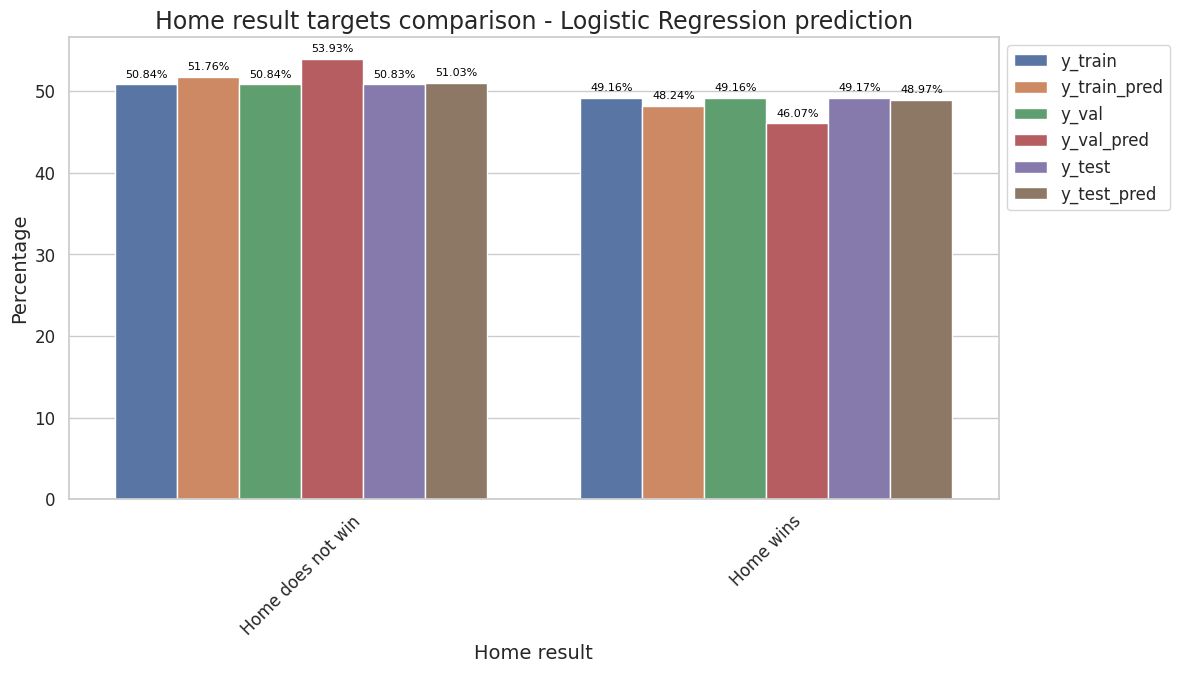

In [ ]:
# To visualize the percentages of 'y' values in a plot
# Calculate unique values and counts for train, val, and test (actual and predicted)
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
unique_values_train_pred, counts_train_pred = np.unique(y_train_pred, return_counts=True)
unique_values_val, counts_val = np.unique(y_val, return_counts=True)
unique_values_val_pred, counts_val_pred = np.unique(y_val_pred, return_counts=True)
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
unique_values_test_pred, counts_test_pred = np.unique(y_test_pred, return_counts=True)

# Create a dataframe for each
data_y_train = {'Values': unique_values_train, 'Percentage': (counts_train/sum(counts_train)*100), 'Label': 'y_train'}
data_y_train_pred = {'Values': unique_values_train_pred, 'Percentage': (counts_train_pred/sum(counts_train_pred)*100), 'Label': 'y_train_pred'}
data_y_val = {'Values': unique_values_val, 'Percentage': (counts_val/sum(counts_val)*100), 'Label': 'y_val'}
data_y_val_pred = {'Values': unique_values_val_pred, 'Percentage': (counts_val_pred/sum(counts_val_pred)*100), 'Label': 'y_val_pred'}
data_y_test = {'Values': unique_values_test, 'Percentage': (counts_test/sum(counts_test)*100), 'Label': 'y_test'}
data_y_test_pred = {'Values': unique_values_test_pred, 'Percentage': (counts_test_pred/sum(counts_test_pred)*100), 'Label': 'y_test_pred'}

# Create dataframes
df_train = pd.DataFrame(data_y_train)
df_train_pred = pd.DataFrame(data_y_train_pred)
df_val = pd.DataFrame(data_y_val)
df_val_pred = pd.DataFrame(data_y_val_pred)
df_test_pred = pd.DataFrame(data_y_test_pred)
df_test = pd.DataFrame(data_y_test)

# Combine the dataframes into one
combined_df = pd.concat([df_train, df_train_pred, df_val, df_val_pred, df_test, df_test_pred], ignore_index=True)

# Map label values before plotting
combined_df['Home result'] = combined_df['Values'].map({0: 'Home does not win', 1: 'Home wins'})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Home result', y='Percentage', hue='Label', data=combined_df)
# Add values on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Home result', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Home result targets comparison - Logistic Regression prediction', fontsize=17)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

Let's see the following observations, comparing the first evaluation of the **Logistic Regression** model with the re-evaluation of the same model:


* An overall improvement in metrics is observed after adding more variables and performing hyperparameter optimization using RandomizedSearch.

* The fact that the metrics on the test set have also improved indicates that the model is able to generalize well to unseen data. This is a positive sign that the changes made have improved the model's ability to make accurate predictions on new data.

* Regarding **Accuracy**, before optimization, the model had moderate performance. After optimization, an increase in accuracy is observed in all sets.

* Regarding **Precision, Recall and F1-Score**, something similar happens. All of these metrics show significant improvements, indicating that the model is now more precise, has greater recall, and has a better balance between precision and recall. In other words, these metrics tell us that the model is not biased towards any particular class and that it is able to classify both classes effectively, and that the model is neither overfitting nor underfitting and has a performance consisting of different data sets.

In summary, the **re-evaluation of the Logistic Regression model** suggests that **the addition of variables and the optimization of hyperparameters have significantly improved the performance of the model**.

## 10. Machine Learning Models using **Pipeline**

In order to avoid data leakage that can occur when applying cross validation in X_trainval, let's try to carry out a similar process by using **Pipelines**.

This is because if the cross-validation data set is not properly separated before preprocessing, the information in one fold may have "leaked" the model through features that should not be available.

In addition, the use of pipelines helps avoid errors and guarantees that the model is trained and evaluated appropriately.

Let's pipeline models within the **Logistic Regression** model family, to continue with the same chosen model.

In [ ]:
# A new dataset, for pipeline
df_soccer_pipeline = pd.read_csv("international_matches.csv", delimiter=',')

In [ ]:
# Add the label
dic_cod = {"Win": 1, "Draw": 0, "Lose": 0}
df_soccer_pipeline["label"] = df_soccer_pipeline["home_team_result"].map(dic_cod)

In [ ]:
# Remove the target column and the ones I want to exclude from the process
df_soccer_pipeline.drop(columns=columns_to_drop, inplace=True)
df_soccer_pipeline.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,city,country,neutral_location,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,label
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,La Paz,Bolivia,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,Maceió,Brazil,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,Quito,Ecuador,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,Conakry,Guinea,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,Asunción,Paraguay,False,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# Delete the target to create X
X = df_soccer_pipeline.drop(["label"], axis=1)

# target variable
y = df_soccer_pipeline.label

# The split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1214)

In [ ]:
# Preprocessing Pipeline:

# For nominal categorical features
cat_nom_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="constant", fill_value="Unknown")),
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse_output=False))

    ]
)

# For numerical features
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('standard_scaler', StandardScaler()),
        ('PCA', PCA(n_components=4))
    ]
)

# Joining pipelines into a preprocessing pipeline
prep_pipeline = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, X_trainval.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        ('cat_nom_pipeline', cat_nom_pipeline, X_trainval.select_dtypes(include=['object']).columns.tolist())
    ],
    remainder='passthrough'
)

With this, we can make a modeling pipeline with hyperparameter tuning.

In [ ]:
# Modeling pipeline
pipe_ml = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('model', LogisticRegression())
    ]
)

# Define hyperparameters for the search
logistic_regression_params = {
    'model__penalty': ['l2'],  # Regularization type (l1: Lasso, l2: Ridge)
    'model__C': [0.1, 1, 10, 50],  # Inverse of regularization strength
    'model__solver': ['liblinear', 'newton-cg'],  # Algorithm for optimization
}

# In other words, 1 x 4 x 2 = 8 combinations

# Configuration of GridSearchCV
best_model = GridSearchCV(pipe_ml, param_grid=logistic_regression_params, cv=5, n_jobs=-1, scoring="f1", refit=True)

# Now, train the model
best_model.fit(X_trainval, y_trainval)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=4))]),
                                                                         ['home_team_fifa_rank',
                                                                          'away_team_fifa_rank',
                                                                          'home_team_total_fifa_points',
                                                                          'away_team_total_fifa_points',
                                                                          '...
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['date',
                                                                          'home_team',
                                                                          'away_team',
                                                                          'home_team_continent',
                                                                          'away_team_continent',
                                                                          'tournament',
                                                                          'city',
                                                                          'country',
                                                                          'shoot_out'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 50], 'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

Let's see the results of this evaluation, ordered with the best one, above:

In [ ]:
pd.DataFrame(best_model.cv_results_).sort_values(by="mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.976005,0.194665,0.276237,0.035835,1,l2,liblinear,"{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.674382,0.647012,0.682472,0.672215,0.685594,0.672335,0.013594,1
3,52.752962,5.290383,0.274812,0.022173,1,l2,newton-cg,"{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}",0.674382,0.646838,0.682472,0.672215,0.685594,0.672300,0.013659,2
1,39.173295,6.594434,0.328668,0.124588,0.1,l2,newton-cg,"{'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}",0.673383,0.656017,0.678238,0.665594,0.680233,0.670693,0.008906,3
0,1.827261,0.474921,0.187048,0.022408,0.1,l2,liblinear,"{'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.673561,0.656017,0.678600,0.664701,0.679884,0.670553,0.009016,4
5,90.771787,3.543266,0.281872,0.012381,10,l2,newton-cg,"{'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}",0.652105,0.639208,0.667727,0.655136,0.671537,0.657143,0.011578,5
4,2.463726,0.301605,0.248492,0.028150,10,l2,liblinear,"{'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.652105,0.639208,0.667727,0.654961,0.671537,0.657108,0.011584,6
7,155.789328,31.001810,0.293528,0.123362,50,l2,newton-cg,"{'model__C': 50, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}",0.646905,0.630284,0.660517,0.644733,0.660220,0.648532,0.011228,7
6,3.072570,0.373504,0.287986,0.039106,50,l2,liblinear,"{'model__C': 50, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.646905,0.629917,0.660517,0.644733,0.660220,0.648458,0.011347,8


Let's compare the data in the first and last row.

- First row:
    - rank_test_score: 1
    - ID: 2
    - mean_test_score: 0.672335
    - std_test_score: 0.013594
- Last row:
    - rank_test_score: 8
    - ID: 6
    - mean_test_score: 0.648458
    - std_test_score: 0.011347

We observed a difference of more than 2 points in the value of mean_test_score. The fact that there is a significant variation in performance between the best and worst combination of hyperparameters suggests that some hyperparameters have a considerable impact on model performance.

And the best hyperparameters are:

In [ ]:
# Best hyperparameters
pd.DataFrame(best_model.cv_results_).sort_values(by="mean_test_score", ascending=False)["params"].iloc[0]

{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

And now with the best model obtained from the Pipeline, let's predict in X_test:

In [ ]:
# Predict with test data
preds_test = best_model.predict(X_test)

# Metrics:
# accuracy
test_accuracy = accuracy_score(y_test, preds_test)
print("Accuracy on test:", test_accuracy)

# precision
test_precision = precision_score(y_test, preds_test, average='macro', zero_division=1)
print("Precision on test:", test_precision)

# Recall
test_recall = recall_score(y_test, preds_test, average='macro', zero_division=1)
print("Recall on test:", test_recall)

# F1-score
test_f1 = f1_score(y_test, preds_test, average='macro', zero_division=1)
print("F1-Score on test:", test_f1)

# Classification report
test_report = classification_report(y_test, preds_test, zero_division=1)
print("\nClassification report on test:\n", test_report)

# confusion matrix
test_cm = confusion_matrix(y_test, preds_test)
print("\nConfusion Matrix on test:\n")
print(test_cm)

Accuracy on test: 0.6844305120167189
Precision on test: 0.6843754782765481
Recall on test: 0.6844134971872413
F1-Score on test: 0.6843825274943012

Classification report on test:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      2432
           1       0.68      0.68      0.68      2353

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68      0.68      0.68      4785


Confusion Matrix on test:

[[1667  765]
 [ 745 1608]]


With this, the evaluation in X_test, after applying Pipeline, was obtained.

As a final conclusion, both approaches (manual hyperparameter optimization and Pipeline) have given fairly close results in terms of evaluation metrics. Using different search strategies and hyperparameter evaluation may lead to slight variations in the final results.

Optimizing hyperparameters and adding new variables have improved the performance of the model compared to the initial evaluation.